# Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set()

# Load the data

In [3]:
loan_data_preprocessed =pd.read_csv('loan_data_2015.csv')

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
loan_data = loan_data_preprocessed.copy()

In [5]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,68444620,73334399,35000,35000,35000.0,60 months,11.99,778.38,C,C1,...,35367.0,49.3,0.0,1.0,5020.0,40.1,52200.0,1.0,4.0,0.0
1,68547583,73437441,8650,8650,8650.0,36 months,5.32,260.50,A,A1,...,24041.0,88.8,0.0,3.0,3081.0,57.9,26800.0,1.0,0.0,5.0
2,67849662,72708407,4225,4225,4225.0,36 months,14.85,146.16,C,C5,...,3830.0,21.9,0.0,0.0,367.0,22.4,4300.0,0.0,0.0,0.0
3,68506885,73396712,10000,10000,10000.0,60 months,11.99,222.40,C,C1,...,35354.0,75.5,1.0,1.0,3118.0,67.4,14200.0,1.0,1.0,1.0
4,68341763,72928789,20000,20000,20000.0,60 months,10.78,432.66,B,B4,...,10827.0,72.8,0.0,2.0,2081.0,64.7,14000.0,2.0,5.0,1.0


In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           421094 non-null  int64  
 1   member_id                    421094 non-null  int64  
 2   loan_amnt                    421094 non-null  int64  
 3   funded_amnt                  421094 non-null  int64  
 4   funded_amnt_inv              421094 non-null  float64
 5   term                         421094 non-null  object 
 6   int_rate                     421094 non-null  float64
 7   installment                  421094 non-null  float64
 8   grade                        421094 non-null  object 
 9   sub_grade                    421094 non-null  object 
 10  emp_title                    397220 non-null  object 
 11  emp_length                   397277 non-null  object 
 12  home_ownership               421094 non-null  object 
 13 

In [7]:
pd.options.display.max_columns = None

In [8]:
na_data = loan_data.isnull().mean()

In [9]:
na_data[na_data>0.8]

desc                         0.999893
mths_since_last_record       0.823282
annual_inc_joint             0.998786
dti_joint                    0.998791
verification_status_joint    0.998786
open_acc_6m                  0.949246
open_il_6m                   0.949246
open_il_12m                  0.949246
open_il_24m                  0.949246
mths_since_rcnt_il           0.950581
total_bal_il                 0.949246
il_util                      0.955789
open_rv_12m                  0.949246
open_rv_24m                  0.949246
max_bal_bc                   0.949246
all_util                     0.949246
inq_fi                       0.949246
total_cu_tl                  0.949246
inq_last_12m                 0.949246
dtype: float64

In [10]:
loan_data = loan_data.dropna(thresh=loan_data.shape[0]*0.2, how='all', axis = 1)

In [11]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,68444620,73334399,35000,35000,35000.0,60 months,11.99,778.38,C,C1,Foreign Service Officer,10+ years,MORTGAGE,128000.0,Source Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,home_improvement,Home improvement,200xx,DC,6.46,0.0,Feb-90,0.0,46.0,17.0,0.0,14277,27.4,46.0,w,35000.0,35000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,56.0,1,INDIVIDUAL,0.0,321.0,146867.0,52200.0
1,68547583,73437441,8650,8650,8650.0,36 months,5.32,260.50,A,A1,Associate Consultant,< 1 year,MORTGAGE,100000.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Credit card refinancing,462xx,IN,7.28,0.0,Jul-01,0.0,NaN,15.0,0.0,7158,26.7,24.0,w,8650.0,8650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,165450.0,26800.0
2,67849662,72708407,4225,4225,4225.0,36 months,14.85,146.16,C,C5,mechanic,5 years,RENT,35000.0,Source Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,672xx,KS,15.22,2.0,Jul-11,0.0,18.0,6.0,0.0,1058,24.6,6.0,w,4225.0,4225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,4888.0,4300.0
3,68506885,73396712,10000,10000,10000.0,60 months,11.99,222.40,C,C1,CARDIOVASCULAR TECH,10+ years,RENT,42500.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,460xx,IN,31.04,0.0,Dec-98,1.0,NaN,10.0,0.0,5812,40.9,23.0,w,10000.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,41166.0,14200.0
4,68341763,72928789,20000,20000,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-00,0.0,NaN,6.0,0.0,7869,56.2,18.0,w,20000.0,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Dec-15,0.0,NaN,1,JOINT,0.0,0.0,189699.0,14000.0


In [12]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'], dtype=object)

In [13]:
loan_data.drop(['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'title', 'zip_code', 'next_pymnt_d', 'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee'], axis =1, inplace= True)

#### Prepare Target Variable

In [14]:
loan_data['loan_status'].value_counts()

Current               377553
Fully Paid             22984
Issued                  8460
Late (31-120 days)      4691
In Grace Period         3107
Charged Off             2773
Late (16-30 days)       1139
Default                  387
Name: loan_status, dtype: int64

In [15]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off','Late (31-120 days)','Default']),0,1)

#### General data cleaning

In [16]:
loan_data['emp_length'].value_counts()

10+ years    141520
2 years       37497
< 1 year      34340
3 years       33430
1 year        27473
5 years       24930
4 years       24506
8 years       21560
7 years       18414
6 years       16838
9 years       16769
Name: emp_length, dtype: int64

In [17]:
loan_data['emp_length'] = loan_data['emp_length'].str.replace('< 1 year', str(0))
loan_data['emp_length'] = loan_data['emp_length'].str.replace('\+ years','')
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' years','')
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' year','')

<ipython-input-17-cd4523cae84e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length'] = loan_data['emp_length'].str.replace('\+ years','')


In [18]:
loan_data['emp_length'] = pd.to_numeric(loan_data['emp_length'])

In [19]:
loan_data['emp_length'].fillna(0, inplace= True)

#### convert date time to the number of month since last date

In [20]:
def date_columns(df, column):
    # store current month
    today_date = pd.to_datetime('2020-08-01')
    # convert to datetime format
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    # calculate the difference in months and add to a new column
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df['mths_since_' + column] = df['mths_since_' + column].apply(lambda x: df['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df.drop(columns = [column], inplace = True)

In [21]:
date_columns(loan_data, 'earliest_cr_line')
date_columns(loan_data, 'issue_d')
date_columns(loan_data, 'last_pymnt_d')
date_columns(loan_data, 'last_credit_pull_d')

#### convert term 

In [22]:
loan_data['term'] = loan_data['term'].apply(lambda x: int(x[:3]))

In [23]:
loan_data['good_bad'].value_counts()

1    413243
0      7851
Name: good_bad, dtype: int64

In [24]:
#split data into category and interger for feature selection
loan_data_int = loan_data.select_dtypes(include= 'number').copy()
loan_data_cat = loan_data.select_dtypes(include= 'object').copy()
loan_data_int.drop('good_bad', axis = 1, inplace=True)
loan_data_cat.drop('loan_status', axis=1, inplace=True)

In [25]:
loan_data_target = loan_data['good_bad']

## Feature Selection

#### Chi-squared statistic for categorical features

In [26]:
from scipy.stats import chi2_contingency

In [27]:
chi2_check = {}

In [28]:
# loop over each columns and calculate chi-statistic with the target variable
for column in loan_data_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(loan_data_target,loan_data_cat[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p_value',[]).append(round(p, 10))

# Convert a dictionary to Dataframe
chi2_result = pd.DataFrame(chi2_check)
chi2_result.sort_values(by='p_value', ascending=True, ignore_index=True, inplace=True)
chi2_result

,Feature,p_value
0,grade,0.000000
1,home_ownership,0.000000
2,verification_status,0.000000
3,purpose,0.000000
4,addr_state,0.000000
5,initial_list_status,0.000000
6,pymnt_plan,0.000373
7,application_type,0.021471


In [29]:
# for the sake of simplicity, we only choose 4 top features 

In [30]:
top_chi2_features = chi2_result.iloc[:4,0].to_list()

In [31]:
top_chi2_features

['grade', 'home_ownership', 'verification_status', 'purpose']

#### ANOVA F Statistic for numerical features 

In [32]:
#since anova f statistic does not accept missing values we need to double check missing values

In [33]:
loan_data_int.isnull().sum()

loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
emp_length                            0
annual_inc                            0
dti                                   0
delinq_2yrs                           0
inq_last_6mths                        0
mths_since_last_delinq           203961
open_acc                              0
pub_rec                               0
revol_bal                             0
revol_util                          162
total_acc                             0
out_prncp                             0
out_prncp_inv                         0
total_pymnt                           0
total_pymnt_inv                       0
total_rec_int                         0
last_pymnt_amnt                       0
collections_12_mths_ex_med            0
mths_since_last_major_derog      298365


In [34]:
loan_data_int.fillna(loan_data_int.mean(), inplace= True)

In [35]:
from sklearn.feature_selection import f_classif

In [36]:
F_statistic, p_values = f_classif(loan_data_int,loan_data_target)
ANOVA_F_Table = pd.DataFrame(data = {'Numerical Features': loan_data_int.columns.values, 'F Score': F_statistic, 'p-values': p_values.round(10)})
ANOVA_F_Table.sort_values(by='F Score', ascending = False, ignore_index=True, inplace=True)
ANOVA_F_Table

D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [25] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
D:\Anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,Numerical Features,F Score,p-values
0,mths_since_last_pymnt_d,60628.189030,0.000000
1,mths_since_issue_d,6234.296707,0.000000
2,int_rate,5492.593947,0.000000
3,out_prncp,1575.832509,0.000000
4,out_prncp_inv,1575.821017,0.000000
5,inq_last_6mths,602.160122,0.000000
6,mths_since_last_credit_pull_d,576.145201,0.000000
7,total_pymnt,276.774048,0.000000
8,total_pymnt_inv,276.702966,0.000000
9,last_pymnt_amnt,263.303806,0.000000


In [37]:
top_anova_features = ANOVA_F_Table.iloc[:20,0].to_list()

In [38]:
top_anova_features

['mths_since_last_pymnt_d',
 'mths_since_issue_d',
 'int_rate',
 'out_prncp',
 'out_prncp_inv',
 'inq_last_6mths',
 'mths_since_last_credit_pull_d',
 'total_pymnt',
 'total_pymnt_inv',
 'last_pymnt_amnt',
 'total_rec_int',
 'term',
 'mths_since_earliest_cr_line',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'emp_length',
 'revol_util',
 'annual_inc',
 'installment',
 'dti']

#### double check multicollinearity

<AxesSubplot:>

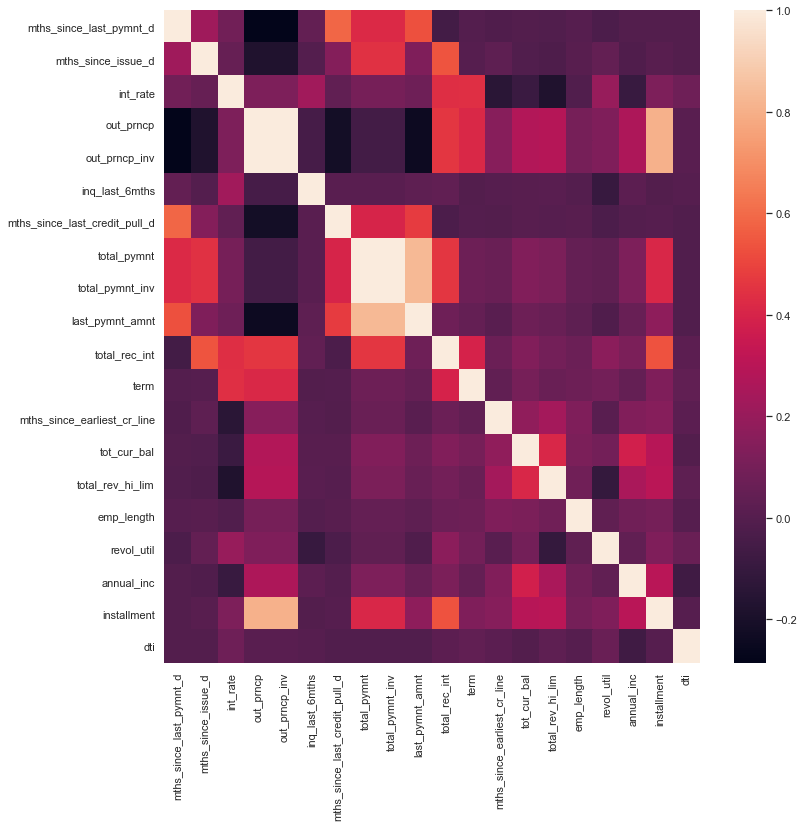

In [39]:
plt.figure(figsize=(12,12))
sns.heatmap(loan_data_int[top_anova_features].corr())

The following features can also be safely dropped given their multicollinearity with other features:

    out_prncp_inv
    
    total_pymnt_inv

In [40]:
loan_data.drop(chi2_result.iloc[4:,0], axis=1, inplace=True)

In [41]:
loan_data.drop(ANOVA_F_Table.iloc[20:,0],axis=1, inplace=True)

In [42]:
loan_data.drop(['out_prncp_inv','total_pymnt_inv'], axis=1, inplace= True)

In [43]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   term                           421094 non-null  int64  
 1   int_rate                       421094 non-null  float64
 2   installment                    421094 non-null  float64
 3   grade                          421094 non-null  object 
 4   emp_length                     421094 non-null  float64
 5   home_ownership                 421094 non-null  object 
 6   annual_inc                     421094 non-null  float64
 7   verification_status            421094 non-null  object 
 8   loan_status                    421094 non-null  object 
 9   purpose                        421094 non-null  object 
 10  dti                            421094 non-null  float64
 11  inq_last_6mths                 421094 non-null  float64
 12  revol_util                    

### Create dummy variables for objects variables

In [44]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix='grade', prefix_sep=':'),
                    pd.get_dummies(loan_data['home_ownership'], prefix='home_ownership', prefix_sep=':'),
                    pd.get_dummies(loan_data['verification_status'], prefix='verification_status', prefix_sep=':'),
                    pd.get_dummies(loan_data['purpose'], prefix='purpose', prefix_sep=':')]

In [45]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [46]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis=1)

## Splitting the data

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = loan_data.drop(['loan_status','good_bad'], axis=1)
y = loan_data['good_bad']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [317]:
X_train_prepr = X_train.copy()

In [318]:
y_train_prepr = y_train.copy()

# Data Preprocessing WOE Binning

### Analyze WoEs and IVs of discrete features

In [319]:
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we combine all of the operations above in a function.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [320]:
# Below we define a function that takes 2 arguments: a dataframe and a number.
# The number parameter has a default value of 0.
# This means that if we call the function and omit the number parameter, it will be executed with it having a value of 0.
# The function displays a graph.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

#### grade

In [321]:
df_temp = woe_discrete(X_train_prepr, 'grade', y_train_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,1740,0.900575,0.005165,1567.0,173.0,0.004740,0.027543,-1.759735,NaN,NaN,0.624137
1,F,7885,0.931389,0.023406,7344.0,541.0,0.022215,0.086133,-1.355142,0.030814,0.404593,0.624137
2,E,28035,0.957696,0.083221,26849.0,1186.0,0.081214,0.188823,-0.843720,0.026307,0.511423,0.624137
3,D,50088,0.967857,0.148684,48478.0,1610.0,0.146639,0.256329,-0.558486,0.010161,0.285234,0.624137
4,C,96465,0.982253,0.286353,94753.0,1712.0,0.286614,0.272568,0.050249,0.014396,0.608735,0.624137
5,B,93967,0.990997,0.278937,93121.0,846.0,0.281678,0.134692,0.737774,0.008744,0.687524,0.624137
6,A,58695,0.996371,0.174234,58482.0,213.0,0.176900,0.033912,1.651820,0.005374,0.914046,0.624137


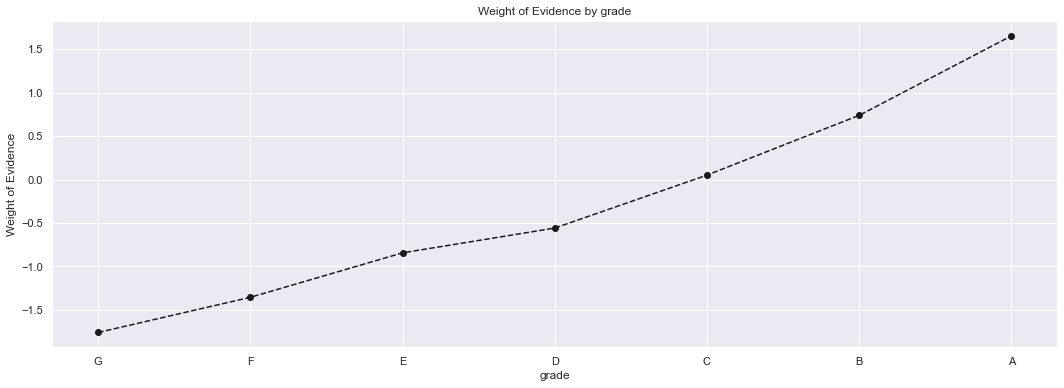

In [322]:
plot_by_woe(df_temp)

#### home ownership

In [323]:
df_temp = woe_discrete(X_train_prepr, 'home_ownership', y_train_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,RENT,134337,0.976819,0.398774,131223.0,3114.0,0.396931,0.495781,-0.222372,NaN,NaN,inf
1,OWN,36458,0.980718,0.108224,35755.0,703.0,0.108154,0.111925,-0.034273,0.003898,0.188098,inf
2,MORTGAGE,166079,0.985164,0.492999,163615.0,2464.0,0.494912,0.392294,0.232368,0.004446,0.266642,inf
3,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.014836,inf,inf


In [324]:
# since there is only one any observation, we create new discrete variable and combine any with 
X_train_prepr['home_ownership:MORT_ANY'] = sum([X_train_prepr['home_ownership:ANY'],X_train_prepr['home_ownership:MORTGAGE']])

In [325]:
X_train_prepr_temp = X_train_prepr.copy()

In [326]:
X_train_prepr_temp['home_ownership'] = np.where(X_train_prepr_temp['home_ownership']=='ANY', 'MORTGAGE', X_train_prepr_temp['home_ownership'])

In [327]:
df_temp = woe_discrete(X_train_prepr_temp, 'home_ownership', y_train_prepr)

In [328]:
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,RENT,134337,0.976819,0.398774,131223.0,3114.0,0.396931,0.495781,-0.222372,NaN,NaN,0.045957
1,OWN,36458,0.980718,0.108224,35755.0,703.0,0.108154,0.111925,-0.034273,0.003898,0.188098,0.045957
2,MORTGAGE,166080,0.985164,0.493002,163616.0,2464.0,0.494915,0.392294,0.232374,0.004446,0.266648,0.045957


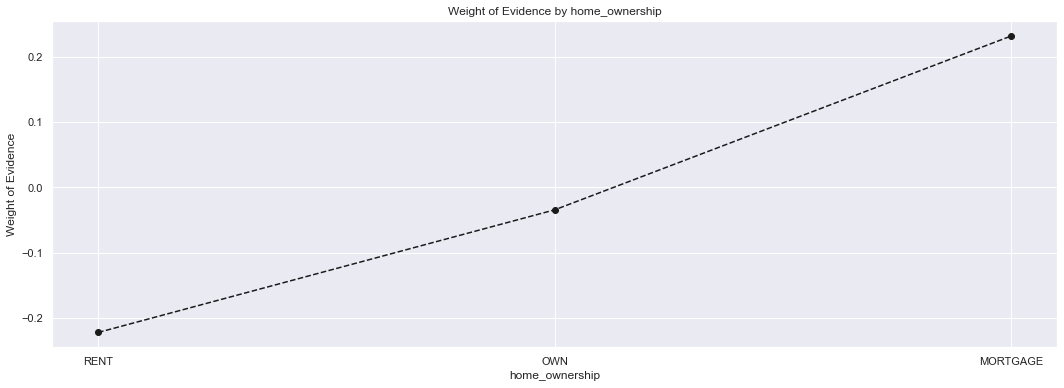

In [329]:
plot_by_woe(df_temp)

#### verification status

In [330]:
df_temp = woe_discrete(X_train_prepr, 'verification_status', y_train_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,98303,0.976491,0.291809,95992.0,2311.0,0.290362,0.367935,-0.236777,NaN,NaN,0.046131
1,Source Verified,143638,0.981182,0.426384,140935.0,2703.0,0.426308,0.430345,-0.009425,0.004691,0.227352,0.046131
2,Not Verified,94934,0.986654,0.281808,93667.0,1267.0,0.283329,0.201719,0.339732,0.005472,0.349158,0.046131


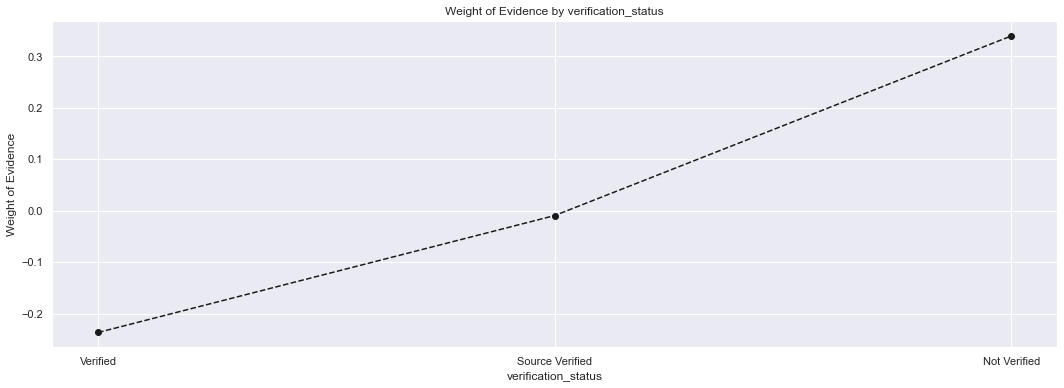

In [331]:
plot_by_woe(df_temp)

#### purpose

In [332]:
df_temp = woe_discrete(X_train_prepr, 'purpose', y_train_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,wedding,4,0.750000,0.000012,3.0,1.0,0.000009,0.000159,-2.864750,NaN,NaN,inf
1,renewable_energy,178,0.943820,0.000528,168.0,10.0,0.000508,0.001592,-1.141983,0.193820,1.722767,inf
2,small_business,2689,0.958349,0.007982,2577.0,112.0,0.007795,0.017832,-0.827479,0.014529,0.314503,inf
3,moving,1941,0.966512,0.005762,1876.0,65.0,0.005675,0.010349,-0.600852,0.008163,0.226628,inf
4,house,1148,0.971254,0.003408,1115.0,33.0,0.003373,0.005254,-0.443260,0.004742,0.157592,inf
5,medical,3193,0.971500,0.009478,3102.0,91.0,0.009383,0.014488,-0.434419,0.000246,0.008841,inf
6,major_purchase,5913,0.976323,0.017553,5773.0,140.0,0.017463,0.022289,-0.244057,0.004823,0.190362,inf
7,other,15359,0.977082,0.045593,15007.0,352.0,0.045394,0.056042,-0.210721,0.000758,0.033336,inf
8,vacation,1784,0.977578,0.005296,1744.0,40.0,0.005275,0.006368,-0.188305,0.000497,0.022416,inf
9,debt_consolidation,200243,0.979844,0.594413,196207.0,4036.0,0.593498,0.642573,-0.079446,0.002266,0.108859,inf


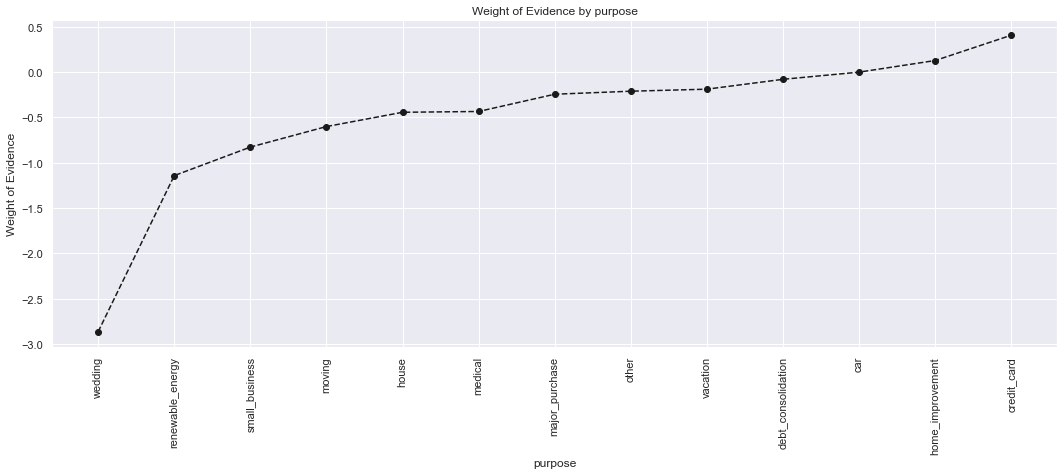

In [333]:
plot_by_woe(df_temp, 90)

In [334]:
# we left debt consolidation and credit card as it is
# we combine wedding, renewable_energy_small_business, moving, house as 1 dummy variable
# we combine medical, major_purchase and other as 1 dummy variable
# we combine vacation, car, home_improvement and educational

In [335]:
# group 1
X_train_prepr['purpose:wed_ren_en_smal_bus_mov_house'] = sum([X_train_prepr['purpose:wedding'],
                                                             X_train_prepr['purpose:renewable_energy'],
                                                             X_train_prepr['purpose:small_business'],
                                                             X_train_prepr['purpose:moving'],
                                                             X_train_prepr['purpose:house']])
# group 2
X_train_prepr['purpose:med_mj_pur_other'] = sum([X_train_prepr['purpose:medical'],
                                                X_train_prepr['purpose:major_purchase'],
                                                X_train_prepr['purpose:other']])

# group 3
X_train_prepr['purpose:vac_car_home_imp_edu'] = sum([X_train_prepr['purpose:vacation'],
                                                    X_train_prepr['purpose:car'],
                                                    X_train_prepr['purpose:home_improvement'],
                                                    X_train_prepr['purpose:educational']])                                                                                               

In [336]:
X_train_prepr_temp = X_train_prepr.copy()

In [337]:
X_train_prepr_temp['purpose'] = np.where(X_train_prepr_temp['purpose'].isin(['wedding','renewable_energy','small_business','moving','house']),'group 1', X_train_prepr_temp['purpose'])

In [338]:
X_train_prepr_temp['purpose'] = np.where(X_train_prepr_temp['purpose'].isin(['medical','major_purchase','other']),'group 2', X_train_prepr_temp['purpose'])

In [339]:
X_train_prepr_temp['purpose'] = np.where(X_train_prepr_temp['purpose'].isin(['vacation','car','home_improvement','educational']),'group 3', X_train_prepr_temp['purpose'])

In [340]:
df_temp = woe_discrete(X_train_prepr_temp, 'purpose',y_train_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,group 1,5960,0.962919,0.017692,5739.0,221.0,0.017360,0.035185,-0.706484,NaN,NaN,0.055311
1,group 2,24465,0.976170,0.072623,23882.0,583.0,0.072240,0.092820,-0.250669,0.013251,0.455816,0.055311
2,debt_consolidation,200243,0.979844,0.594413,196207.0,4036.0,0.593498,0.642573,-0.079446,0.003674,0.171223,0.055311
3,group 3,24761,0.982876,0.073502,24337.0,424.0,0.073616,0.067505,0.086658,0.003032,0.166104,0.055311
4,credit_card,81446,0.987513,0.241769,80429.0,1017.0,0.243286,0.161917,0.407156,0.004637,0.320498,0.055311


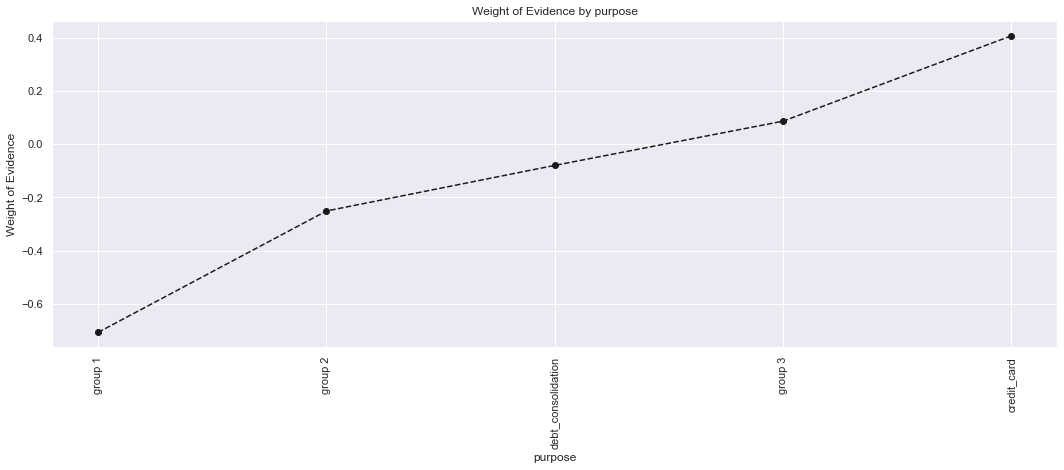

In [341]:
plot_by_woe(df_temp, 90)

In [342]:
X_train_prepr.columns.values

array(['term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'dti', 'inq_last_6mths', 'revol_util', 'out_prncp', 'total_pymnt',
       'total_rec_int', 'last_pymnt_amnt', 'tot_cur_bal',
       'total_rev_hi_lim', 'mths_since_earliest_cr_line',
       'mths_since_issue_d', 'mths_since_last_pymnt_d',
       'mths_since_last_credit_pull_d', 'grade:A', 'grade:B', 'grade:C',
       'grade:D', 'grade:E', 'grade:F', 'grade:G', 'home_ownership:ANY',
       'home_ownership:MORTGAGE', 'home_ownership:OWN',
       'home_ownership:RENT', 'verification_status:Not Verified',
       'verification_status:Source Verified',
       'verification_status:Verified', 'purpose:car',
       'purpose:credit_card', 'purpose:debt_consolidation',
       'purpose:educational', 'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_

### Analyze WoEs and IVs of continuous variables

In [343]:
# WoE function for discrete unordered variables
def woe_ordered_continuous(df, continuous_variable_name, good_bad_variable_df):
    df = pd.concat([df[continuous_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we combine all of the operations above in a function.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [344]:
X_train_prepr.columns.values

array(['term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'dti', 'inq_last_6mths', 'revol_util', 'out_prncp', 'total_pymnt',
       'total_rec_int', 'last_pymnt_amnt', 'tot_cur_bal',
       'total_rev_hi_lim', 'mths_since_earliest_cr_line',
       'mths_since_issue_d', 'mths_since_last_pymnt_d',
       'mths_since_last_credit_pull_d', 'grade:A', 'grade:B', 'grade:C',
       'grade:D', 'grade:E', 'grade:F', 'grade:G', 'home_ownership:ANY',
       'home_ownership:MORTGAGE', 'home_ownership:OWN',
       'home_ownership:RENT', 'verification_status:Not Verified',
       'verification_status:Source Verified',
       'verification_status:Verified', 'purpose:car',
       'purpose:credit_card', 'purpose:debt_consolidation',
       'purpose:educational', 'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_

#### term

In [345]:
df_temp = woe_ordered_continuous(X_train_prepr, 'term', y_train_prepr)
df_temp

,term,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,226461,0.983370,0.67224,222695.0,3766.0,0.673621,0.599586,0.116428,NaN,NaN,0.023755
1,60,110414,0.977222,0.32776,107899.0,2515.0,0.326379,0.400414,-0.204439,0.006148,0.320867,0.023755


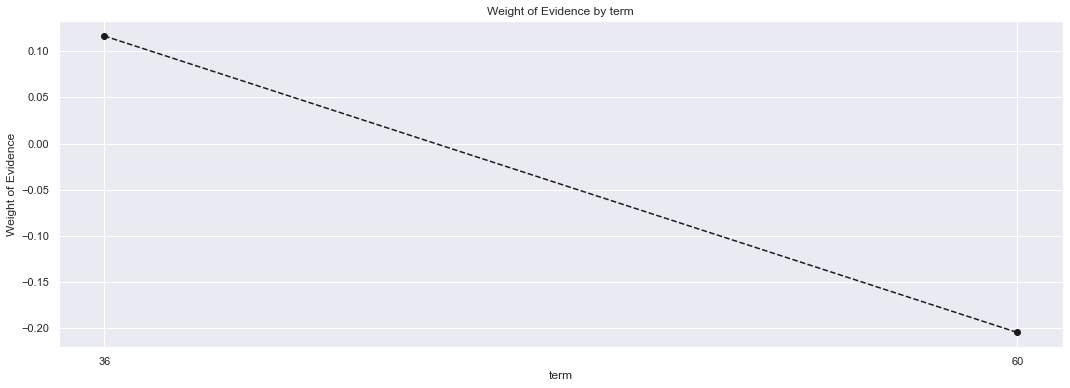

In [346]:
plot_by_woe(df_temp)

In [347]:
X_train_prepr['term:36'] = np.where(X_train_prepr['term']==36, 1,0)
X_train_prepr['term:60'] = np.where(X_train_prepr['term']==60, 1,0)

#### int_rate

In [348]:
X_train_prepr['int_rate_factor'] = pd.cut(X_train_prepr['int_rate'],50)

In [349]:
df_temp = woe_ordered_continuous(X_train_prepr, 'int_rate_factor', y_train_prepr)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.296, 5.793]",7779,0.999743,0.023092,7777.0,2.0,0.023524,0.000318,4.302417,NaN,NaN,inf
1,"(5.793, 6.267]",8147,0.997422,0.024184,8126.0,21.0,0.024580,0.003343,1.994940,0.002321,2.307477,inf
2,"(6.267, 6.74]",5257,0.994864,0.015605,5230.0,27.0,0.015820,0.004299,1.302968,0.002558,0.691972,inf
3,"(6.74, 7.214]",9990,0.995195,0.029655,9942.0,48.0,0.030073,0.007642,1.369961,0.000331,0.066993,inf
4,"(7.214, 7.687]",9080,0.997797,0.026954,9060.0,20.0,0.027405,0.003184,2.152530,0.002602,0.782570,inf
5,"(7.687, 8.16]",16536,0.995706,0.049086,16465.0,71.0,0.049804,0.011304,1.482950,0.002091,0.669580,inf
6,"(8.16, 8.634]",17945,0.994037,0.053269,17838.0,107.0,0.053957,0.017036,1.152896,0.001669,0.330055,inf
7,"(8.634, 9.107]",1628,0.977273,0.004833,1591.0,37.0,0.004813,0.005891,-0.202162,0.016765,1.355057,inf
8,"(9.107, 9.581]",17780,0.992745,0.052779,17651.0,129.0,0.053392,0.020538,0.955373,0.015472,1.157535,inf
9,"(9.581, 10.054]",17883,0.994352,0.053085,17782.0,101.0,0.053788,0.016080,1.207460,0.001608,0.252086,inf


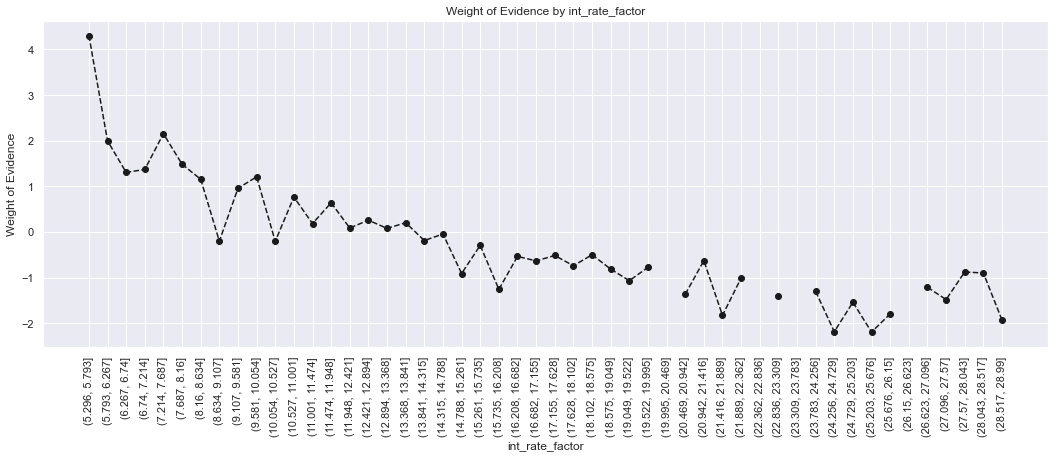

In [350]:
plot_by_woe(df_temp, 90)

In [351]:
X_train_prepr['int_rate:<8.16'] = np.where(X_train_prepr['int_rate']<=8.16,1,0)
X_train_prepr['int_rate:8.16-11.948'] = np.where((X_train_prepr['int_rate']>8.16) & (X_train_prepr['int_rate']<=11.948),1,0)
X_train_prepr['int_rate:11.948-14.788'] = np.where((X_train_prepr['int_rate']>11.948) & (X_train_prepr['int_rate']<=14.788),1,0)
X_train_prepr['int_rate:14.788-19.049'] = np.where((X_train_prepr['int_rate']>14.788) & (X_train_prepr['int_rate']<=19.049),1,0)
X_train_prepr['int_rate:>19.049'] = np.where(X_train_prepr['int_rate']>19.049,1,0)

#### installments

In [352]:
X_train_prepr['installment_factor'] = pd.cut(X_train_prepr['installment'],50)
df_temp = woe_ordered_continuous(X_train_prepr, 'installment_factor', y_train_prepr)

In [353]:
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(28.705, 58.427]",2805,0.984314,0.008327,2761.0,44.0,0.008352,0.007005,0.175797,NaN,NaN,inf
1,"(58.427, 86.734]",4645,0.979978,0.013788,4552.0,93.0,0.013769,0.014807,-0.072639,0.004335,0.248436,inf
2,"(86.734, 115.04]",6546,0.983196,0.019432,6436.0,110.0,0.019468,0.017513,0.105820,0.003217,0.178460,inf
3,"(115.04, 143.347]",7347,0.982578,0.021809,7219.0,128.0,0.021836,0.020379,0.069080,0.000618,0.036741,inf
4,"(143.347, 171.654]",14398,0.984859,0.042740,14180.0,218.0,0.042892,0.034708,0.211731,0.002281,0.142651,inf
5,"(171.654, 199.961]",12448,0.985540,0.036951,12268.0,180.0,0.037109,0.028658,0.258431,0.000681,0.046700,inf
6,"(199.961, 228.268]",13209,0.982133,0.039210,12973.0,236.0,0.039241,0.037574,0.043432,0.003406,0.214999,inf
7,"(228.268, 256.574]",17591,0.983003,0.052218,17292.0,299.0,0.052306,0.047604,0.094194,0.000869,0.050762,inf
8,"(256.574, 284.881]",20257,0.980994,0.060132,19872.0,385.0,0.060110,0.061296,-0.019538,0.002008,0.113732,inf
9,"(284.881, 313.188]",19318,0.980950,0.057345,18950.0,368.0,0.057321,0.058589,-0.021886,0.000044,0.002347,inf


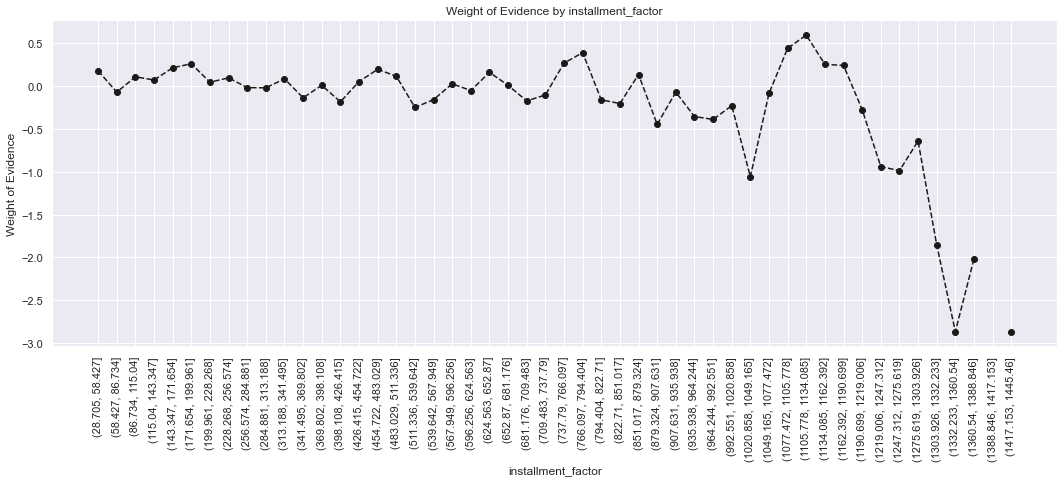

In [354]:
plot_by_woe(df_temp, 90)

In [355]:
X_train_prepr_temp = X_train_prepr.copy()

In [356]:
X_train_prepr_temp = X_train_prepr_temp[X_train_prepr_temp['installment']<=1000]

In [357]:
X_train_prepr_temp['installment_factor'] = pd.cut(X_train_prepr_temp['installment'], 25)
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'installment_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(29.15, 68.915]",4646,0.984718,0.014271,4575.0,71.0,0.014316,0.011827,0.190987,NaN,NaN,0.021627
1,"(68.915, 107.71]",7929,0.980452,0.024355,7774.0,155.0,0.024327,0.025820,-0.059580,0.004267,0.250567,0.021627
2,"(107.71, 146.504]",9333,0.982857,0.028667,9173.0,160.0,0.028705,0.026653,0.074151,0.002405,0.133731,0.021627
3,"(146.504, 185.299]",18786,0.984669,0.057703,18498.0,288.0,0.057885,0.047976,0.187762,0.001813,0.113612,0.021627
4,"(185.299, 224.094]",19042,0.984298,0.058489,18743.0,299.0,0.058652,0.049808,0.163437,0.000372,0.024325,0.021627
5,"(224.094, 262.889]",23623,0.982475,0.072560,23209.0,414.0,0.072627,0.068966,0.051734,0.001823,0.111703,0.021627
6,"(262.889, 301.684]",25388,0.979557,0.077981,24869.0,519.0,0.077822,0.086457,-0.105222,0.002917,0.156956,0.021627
7,"(301.684, 340.478]",32490,0.983349,0.099795,31949.0,541.0,0.099977,0.090122,0.103782,0.003791,0.209003,0.021627
8,"(340.478, 379.273]",23633,0.980578,0.072591,23174.0,459.0,0.072518,0.076462,-0.052959,0.002771,0.156741,0.021627
9,"(379.273, 418.068]",19950,0.977945,0.061278,19510.0,440.0,0.061052,0.073297,-0.182787,0.002633,0.129828,0.021627


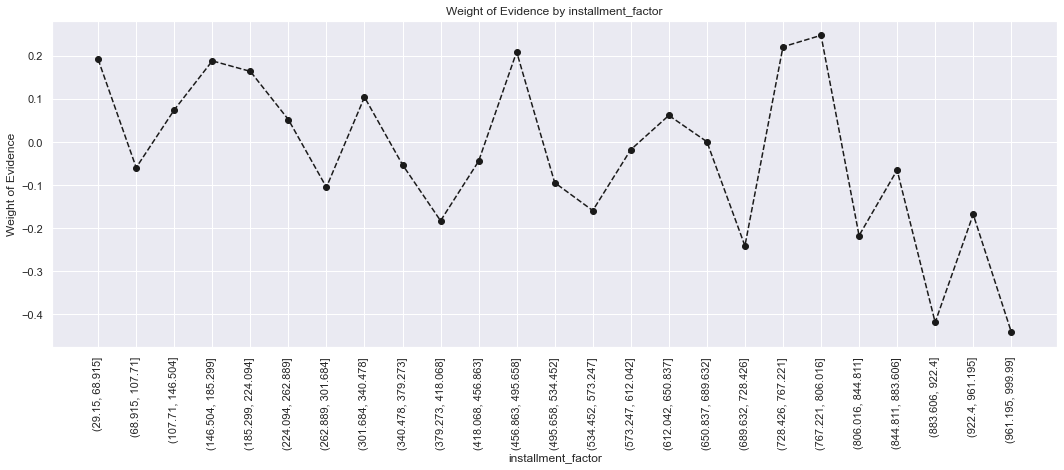

In [358]:
plot_by_woe(df_temp, 90)

There is no distinct differences in WOE between each intervals of installment factors, hence there is no clear relationship between installment and PD, therefore we can ignore installment

#### emp_length

In [359]:
df_temp = woe_ordered_continuous(X_train_prepr, 'emp_length', y_train_prepr)

In [360]:
df_temp

,emp_length,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,46415,0.977572,0.137781,45374.0,1041.0,0.137250,0.165738,-0.188604,NaN,NaN,0.019713
1,1.0,21994,0.977585,0.065288,21501.0,493.0,0.065037,0.078491,-0.188016,0.000013,0.000588,0.019713
2,2.0,30073,0.981046,0.089271,29503.0,570.0,0.089242,0.090750,-0.016751,0.003461,0.171265,0.019713
3,3.0,26702,0.981387,0.079264,26205.0,497.0,0.079266,0.079128,0.001754,0.000341,0.018505,0.019713
4,4.0,19591,0.979889,0.058155,19197.0,394.0,0.058068,0.062729,-0.077203,0.001498,0.078957,0.019713
5,5.0,19978,0.981980,0.059304,19618.0,360.0,0.059342,0.057316,0.034737,0.002091,0.111940,0.019713
6,6.0,13557,0.977945,0.040243,13258.0,299.0,0.040104,0.047604,-0.171449,0.004035,0.206186,0.019713
7,7.0,14684,0.978684,0.043589,14371.0,313.0,0.043470,0.049833,-0.136597,0.000739,0.034852,0.019713
8,8.0,17383,0.984180,0.051601,17108.0,275.0,0.051749,0.043783,0.167169,0.005496,0.303766,0.019713
9,9.0,13430,0.982800,0.039866,13199.0,231.0,0.039925,0.036778,0.082117,0.001380,0.085052,0.019713


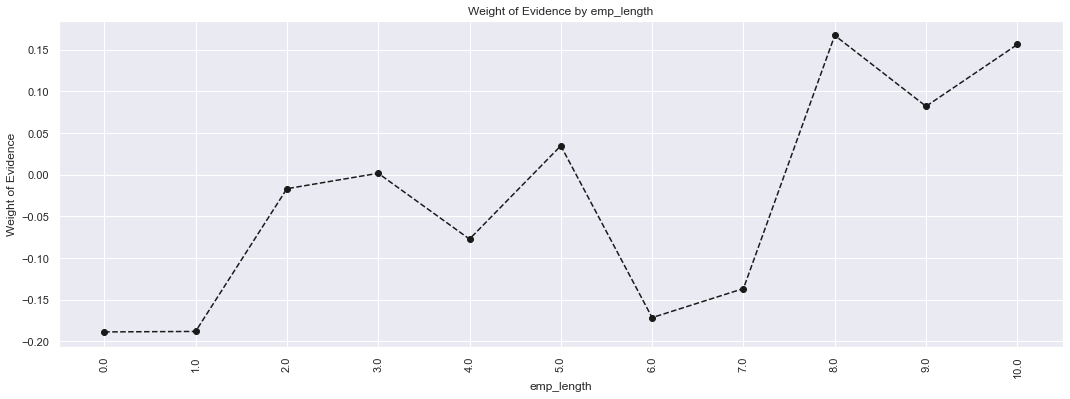

In [361]:
plot_by_woe(df_temp, 90)

In [362]:
X_train_prepr['emp_length:0-1'] = np.where(X_train_prepr['emp_length'].isin(range(0, 2)), 1, 0)
X_train_prepr['emp_length:2-5'] = np.where(X_train_prepr['emp_length'].isin(range(2, 6)), 1, 0)
X_train_prepr['emp_length:6-7'] = np.where(X_train_prepr['emp_length'].isin(range(6, 8)), 1, 0)
X_train_prepr['emp_length:8'] = np.where(X_train_prepr['emp_length'].isin([8]), 1, 0)
X_train_prepr['emp_length:9'] = np.where(X_train_prepr['emp_length'].isin([9]), 1, 0)
X_train_prepr['emp_length:10'] = np.where(X_train_prepr['emp_length'].isin([10]), 1, 0)

#### annual_inc

In [363]:
X_train_prepr['annual_inc_factor'] = pd.cut(X_train_prepr['annual_inc'], 50)

In [364]:
df_temp = woe_ordered_continuous(X_train_prepr, 'annual_inc_factor', y_train_prepr)
df_temp

D:\Anaconda\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9500.0, 190000.0]",327813,0.981215,0.973100,321655.0,6158.0,0.972961,0.980417,-0.007634,NaN,NaN,inf
1,"(190000.0, 380000.0]",7952,0.985664,0.023605,7838.0,114.0,0.023709,0.018150,0.267179,0.004449,0.274813,inf
2,"(380000.0, 570000.0]",743,0.991925,0.002206,737.0,6.0,0.002229,0.000955,0.847467,0.006261,0.580288,inf
3,"(570000.0, 760000.0]",213,1.000000,0.000632,213.0,0.0,0.000644,0.000000,inf,0.008075,inf,inf
4,"(760000.0, 950000.0]",54,1.000000,0.000160,54.0,0.0,0.000163,0.000000,inf,0.000000,NaN,inf
5,"(950000.0, 1140000.0]",34,1.000000,0.000101,34.0,0.0,0.000103,0.000000,inf,0.000000,NaN,inf
6,"(1140000.0, 1330000.0]",15,0.933333,0.000045,14.0,1.0,0.000042,0.000159,-1.324305,0.066667,inf,inf
7,"(1330000.0, 1520000.0]",12,1.000000,0.000036,12.0,0.0,0.000036,0.000000,inf,0.066667,inf,inf
8,"(1520000.0, 1710000.0]",2,0.500000,0.000006,1.0,1.0,0.000003,0.000159,-3.963362,0.500000,inf,inf
9,"(1710000.0, 1900000.0]",4,1.000000,0.000012,4.0,0.0,0.000012,0.000000,inf,0.500000,inf,inf


In [365]:
# Initial examination shows there are few individuals who have very high income (up to 9 mil )
# since 98% of observations have income <190k, we will have one category for any observations that have income >190k
# we will apply the woe binning for all income lower than 190k

In [366]:
X_train_prepr_temp = X_train_prepr[(X_train_prepr['annual_inc']<=190000) & (X_train_prepr['annual_inc']>7000)]

In [367]:
X_train_prepr_temp['annual_inc_factor'] = pd.cut(X_train_prepr_temp['annual_inc'],25)
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'annual_inc_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

<ipython-input-367-38164af5bba2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_prepr_temp['annual_inc_factor'] = pd.cut(X_train_prepr_temp['annual_inc'],25)


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(6884.067, 14384.32]",1122,0.974153,0.003423,1093.0,29.0,0.003398,0.004709,-0.326264,NaN,NaN,0.036299
1,"(14384.32, 21701.64]",4656,0.971435,0.014204,4523.0,133.0,0.014063,0.021598,-0.429068,0.002719,0.102804,0.036299
2,"(21701.64, 29018.96]",12030,0.975894,0.036701,11740.0,290.0,0.036502,0.047093,-0.254774,0.004459,0.174295,0.036299
3,"(29018.96, 36336.28]",24390,0.975482,0.074408,23792.0,598.0,0.073973,0.097109,-0.272136,0.000412,0.017362,0.036299
4,"(36336.28, 43653.6]",28188,0.976692,0.085995,27531.0,657.0,0.085598,0.106690,-0.220266,0.001210,0.051870,0.036299
5,"(43653.6, 50970.92]",37093,0.979646,0.113162,36338.0,755.0,0.112981,0.122605,-0.081748,0.002954,0.138518,0.036299
6,"(50970.92, 58288.24]",30350,0.981582,0.092590,29791.0,559.0,0.092625,0.090776,0.020162,0.001936,0.101911,0.036299
7,"(58288.24, 65605.56]",35596,0.980841,0.108595,34914.0,682.0,0.108553,0.110750,-0.020036,0.000741,0.040199,0.036299
8,"(65605.56, 72922.88]",24410,0.983613,0.074469,24010.0,400.0,0.074651,0.064956,0.139111,0.002773,0.159148,0.036299
9,"(72922.88, 80240.2]",28153,0.982062,0.085888,27648.0,505.0,0.085962,0.082007,0.047100,0.001551,0.092011,0.036299


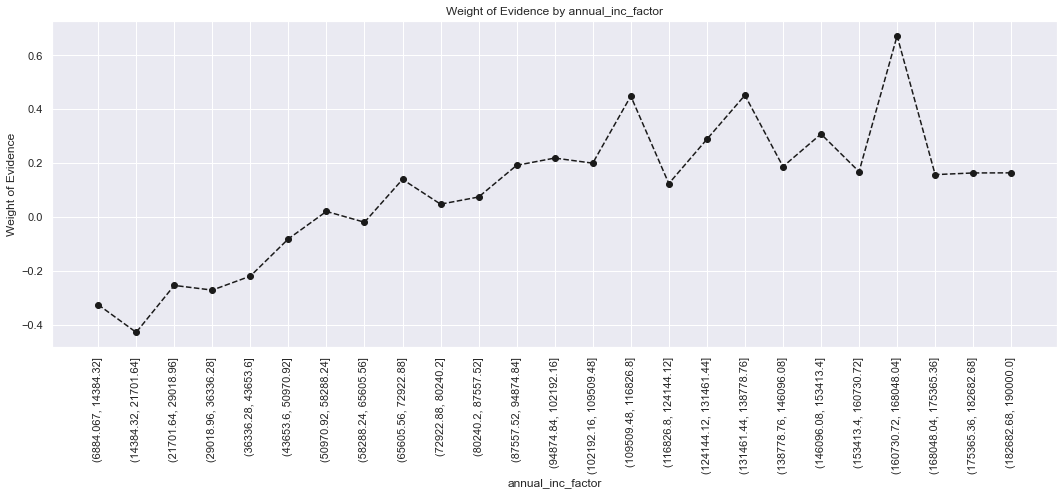

In [368]:
plot_by_woe(df_temp, 90)

In [248]:
X_train_prepr['annual_inc:<20k'] = np.where(X_train_prepr['annual_inc']<=20000,1,0)
X_train_prepr['annual_inc:20k-30k'] = np.where((X_train_prepr['annual_inc']>20000) & (X_train_prepr['annual_inc']<=30000),1,0)
X_train_prepr['annual_inc:30k-40k'] = np.where((X_train_prepr['annual_inc']>30000) & (X_train_prepr['annual_inc']<=40000),1,0)
X_train_prepr['annual_inc:40k-50k'] = np.where((X_train_prepr['annual_inc']>40000) & (X_train_prepr['annual_inc']<=50000),1,0)
X_train_prepr['annual_inc:50k-60k'] = np.where((X_train_prepr['annual_inc']>50000) & (X_train_prepr['annual_inc']<=60000),1,0)
X_train_prepr['annual_inc:60k-70k'] = np.where((X_train_prepr['annual_inc']>60000) & (X_train_prepr['annual_inc']<=70000),1,0)
X_train_prepr['annual_inc:70k-80k'] = np.where((X_train_prepr['annual_inc']>70000) & (X_train_prepr['annual_inc']<=80000),1,0)
X_train_prepr['annual_inc:80k-90k'] = np.where((X_train_prepr['annual_inc']>80000) & (X_train_prepr['annual_inc']<=90000),1,0)
X_train_prepr['annual_inc:90k-100k'] = np.where((X_train_prepr['annual_inc']>90000) & (X_train_prepr['annual_inc']<=100000),1,0)
X_train_prepr['annual_inc:100k-120k'] = np.where((X_train_prepr['annual_inc']>100000) & (X_train_prepr['annual_inc']<=120000),1,0)
X_train_prepr['annual_inc:120k-140k'] = np.where((X_train_prepr['annual_inc']>120000) & (X_train_prepr['annual_inc']<=140000),1,0)
X_train_prepr['annual_inc:>140k'] = np.where(X_train_prepr['annual_inc']>140000,1,0)

#### out_prncp

In [249]:
# check for possible null variables
X_train_prepr['out_prncp'].isnull().sum()

0

In [250]:
X_train_prepr['out_prncp_factor'] = pd.cut(X_train_prepr['out_prncp'],50)
df_temp = woe_ordered_continuous(X_train_prepr, 'out_prncp_factor', y_train_prepr)
df_temp

,out_prncp_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-35.0, 700.0]",5114,0.893430,0.060723,4569.0,545.0,0.055282,0.347134,-1.837263,NaN,NaN,0.684167
1,"(700.0, 1400.0]",569,0.985940,0.006756,561.0,8.0,0.006788,0.005096,0.286752,0.092510,2.124016,0.684167
2,"(1400.0, 2100.0]",975,0.990769,0.011577,966.0,9.0,0.011688,0.005732,0.712412,0.004829,0.425660,0.684167
3,"(2100.0, 2800.0]",1342,0.988823,0.015935,1327.0,15.0,0.016056,0.009554,0.519099,0.001947,0.193313,0.684167
4,"(2800.0, 3500.0]",1567,0.987875,0.018606,1548.0,19.0,0.018730,0.012102,0.436753,0.000948,0.082346,0.684167
5,"(3500.0, 4200.0]",2210,0.987783,0.026241,2183.0,27.0,0.026413,0.017197,0.429091,0.000092,0.007662,0.684167
6,"(4200.0, 4900.0]",3201,0.987192,0.038008,3160.0,41.0,0.038234,0.026115,0.381228,0.000591,0.047863,0.684167
7,"(4900.0, 5600.0]",2651,0.988684,0.031477,2621.0,30.0,0.031712,0.019108,0.506587,0.001492,0.125359,0.684167
8,"(5600.0, 6300.0]",2715,0.990055,0.032237,2688.0,27.0,0.032523,0.017197,0.637189,0.001372,0.130602,0.684167
9,"(6300.0, 7000.0]",2743,0.985782,0.032570,2704.0,39.0,0.032717,0.024841,0.275399,0.004273,0.361790,0.684167


In [251]:
# We are going to create 1 dummy variable for every observation with more than 34k out_prncp
# for observation lower than 34K, we apply another woe binning

In [252]:
X_train_prepr_temp = X_train_prepr[X_train_prepr['out_prncp']<=34000]

In [253]:
X_train_prepr_temp['out_prncp_factor'] = pd.cut(X_train_prepr_temp['out_prncp'], 25)
df_temp =woe_ordered_continuous(X_train_prepr_temp, 'out_prncp_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

<ipython-input-253-dddee13bac92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_prepr_temp['out_prncp_factor'] = pd.cut(X_train_prepr_temp['out_prncp'], 25)


,out_prncp_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-34.0, 1360.0]",5638,0.901916,0.067540,5085.0,553.0,0.062078,0.353581,-1.739719,NaN,NaN,0.638857
1,"(1360.0, 2720.0]",2137,0.989705,0.025600,2115.0,22.0,0.025820,0.014066,0.607357,0.087790,2.347075,0.638857
2,"(2720.0, 4080.0]",3580,0.987989,0.042886,3537.0,43.0,0.043180,0.027494,0.451423,0.001716,0.155934,0.638857
3,"(4080.0, 5440.0]",5595,0.987668,0.067024,5526.0,69.0,0.067462,0.044118,0.424702,0.000321,0.026721,0.638857
4,"(5440.0, 6800.0]",5263,0.988600,0.063047,5203.0,60.0,0.063519,0.038363,0.504235,0.000932,0.079533,0.638857
5,"(6800.0, 8160.0]",5607,0.988764,0.067168,5544.0,63.0,0.067682,0.040281,0.518926,0.000164,0.014691,0.638857
6,"(8160.0, 9520.0]",5899,0.989320,0.070666,5836.0,63.0,0.071246,0.040281,0.570255,0.000556,0.051329,0.638857
7,"(9520.0, 10880.0]",5899,0.987456,0.070666,5825.0,74.0,0.071112,0.047315,0.407438,0.001865,0.162817,0.638857
8,"(10880.0, 12240.0]",5422,0.985061,0.064952,5341.0,81.0,0.065203,0.051790,0.230308,0.002395,0.177130,0.638857
9,"(12240.0, 13600.0]",4321,0.986577,0.051763,4263.0,58.0,0.052043,0.037084,0.338874,0.001516,0.108566,0.638857


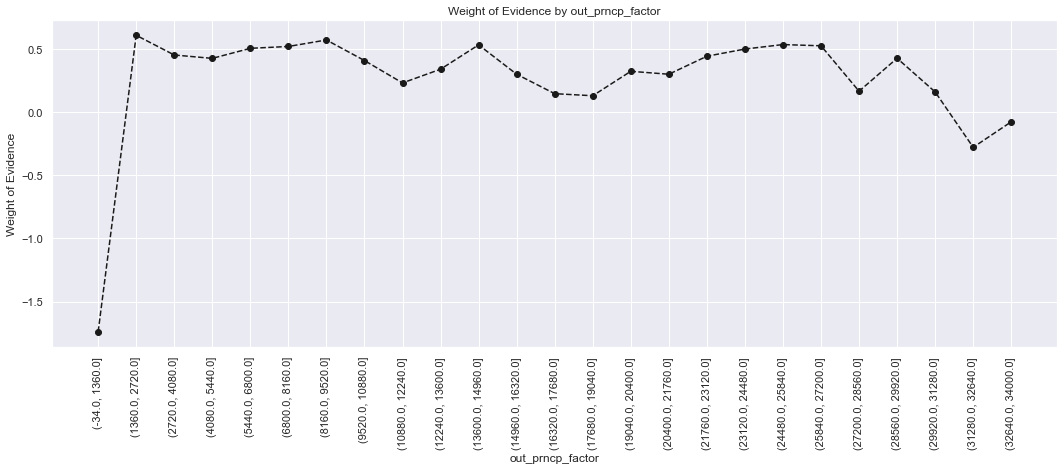

In [254]:
plot_by_woe(df_temp, 90)

In [255]:
X_train_prepr['out_prncp:<1360'] = np.where(X_train_prepr['out_prncp']<=1360,1,0)
X_train_prepr['out_prncp:1360-8160'] = np.where((X_train_prepr['out_prncp']>1360)&(X_train_prepr['out_prncp']<=8160),1,0)
X_train_prepr['out_prncp:8160-13600'] = np.where((X_train_prepr['out_prncp']>8160)&(X_train_prepr['out_prncp']<=13600),1,0)
X_train_prepr['out_prncp:13600-23120'] = np.where((X_train_prepr['out_prncp']>13600)&(X_train_prepr['out_prncp']<=23120),1,0)
X_train_prepr['out_prncp:23120-31280'] = np.where((X_train_prepr['out_prncp']>23120)&(X_train_prepr['out_prncp']<=31280),1,0)
X_train_prepr['out_prncp:>31280'] = np.where(X_train_prepr['out_prncp']>31280,1,0)

#### total_pymnt

In [256]:
X_train_prepr['total_pymnt'].isnull().sum()

0

In [257]:
X_train_prepr['total_pymnt_factor'] = pd.cut(X_train_prepr['total_pymnt'],50)
df_temp = woe_ordered_continuous(X_train_prepr, 'total_pymnt_factor', y_train_prepr)
df_temp

,total_pymnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-42.787, 855.731]",21218,0.985296,0.251938,20906.0,312.0,0.252949,0.198726,0.241261,NaN,NaN,inf
1,"(855.731, 1711.461]",16747,0.976533,0.198851,16354.0,393.0,0.197873,0.250318,-0.235109,0.008762,0.476370,inf
2,"(1711.461, 2567.192]",12825,0.977076,0.152282,12531.0,294.0,0.151617,0.187261,-0.211146,0.000543,0.023963,inf
3,"(2567.192, 3422.922]",9338,0.978475,0.110878,9137.0,201.0,0.110552,0.128025,-0.146745,0.001399,0.064401,inf
4,"(3422.922, 4278.653]",6427,0.978684,0.076313,6290.0,137.0,0.076105,0.087261,-0.136792,0.000209,0.009953,inf
5,"(4278.653, 5134.384]",4483,0.979924,0.053230,4393.0,90.0,0.053152,0.057325,-0.075569,0.001240,0.061223,inf
6,"(5134.384, 5990.114]",3107,0.984551,0.036892,3059.0,48.0,0.037012,0.030573,0.191115,0.004627,0.266684,inf
7,"(5990.114, 6845.845]",2271,0.984588,0.026965,2236.0,35.0,0.027054,0.022293,0.193569,0.000037,0.002453,inf
8,"(6845.845, 7701.575]",1542,0.983139,0.018309,1516.0,26.0,0.018343,0.016561,0.102207,0.001450,0.091362,inf
9,"(7701.575, 8557.306]",1149,0.987815,0.013643,1135.0,14.0,0.013733,0.008917,0.431803,0.004677,0.329597,inf


In [258]:
# Initial examination shows that there are little records of total_pymnt >16000 
# also observation with total_pymnt > 16000 has a very low probability of bads
# therefore we can create 1 dummy variable just for this grou
# We will apply WOE binning for observation with total_pymnt <=25000

In [259]:
X_train_prepr_temp = X_train_prepr[(X_train_prepr['total_pymnt']<=16000)]

In [260]:
X_train_prepr_temp['total_pymnt_factor'] = pd.cut(X_train_prepr_temp['total_pymnt'], 15)
df_temp =woe_ordered_continuous(X_train_prepr_temp, 'total_pymnt_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

<ipython-input-260-d319fc07cda0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_prepr_temp['total_pymnt_factor'] = pd.cut(X_train_prepr_temp['total_pymnt'], 15)


,total_pymnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-15.993, 1066.221]",25768,0.984011,0.312646,25356.0,412.0,0.313618,0.262588,0.177590,NaN,NaN,inf
1,"(1066.221, 2132.441]",18933,0.975704,0.229716,18473.0,460.0,0.228485,0.293180,-0.249318,0.008307,0.426908,inf
2,"(2132.441, 3198.662]",13168,0.978736,0.159769,12888.0,280.0,0.159406,0.178458,-0.112895,0.003033,0.136423,inf
3,"(3198.662, 4264.883]",8619,0.978652,0.104575,8435.0,184.0,0.104329,0.117272,-0.116948,0.000085,0.004053,inf
4,"(4264.883, 5331.103]",5386,0.980134,0.065349,5279.0,107.0,0.065294,0.068196,-0.043494,0.001482,0.073454,inf
5,"(5331.103, 6397.324]",3553,0.986772,0.043109,3506.0,47.0,0.043364,0.029955,0.369926,0.006638,0.413420,inf
6,"(6397.324, 7463.545]",2169,0.982941,0.026317,2132.0,37.0,0.026370,0.023582,0.111741,0.003830,0.258186,inf
7,"(7463.545, 8529.765]",1477,0.984428,0.017921,1454.0,23.0,0.017984,0.014659,0.204422,0.001486,0.092682,inf
8,"(8529.765, 9595.986]",971,0.989701,0.011781,961.0,10.0,0.011886,0.006373,0.623232,0.005273,0.418810,inf
9,"(9595.986, 10662.207]",804,0.993781,0.009755,799.0,5.0,0.009882,0.003187,1.131766,0.004080,0.508534,inf


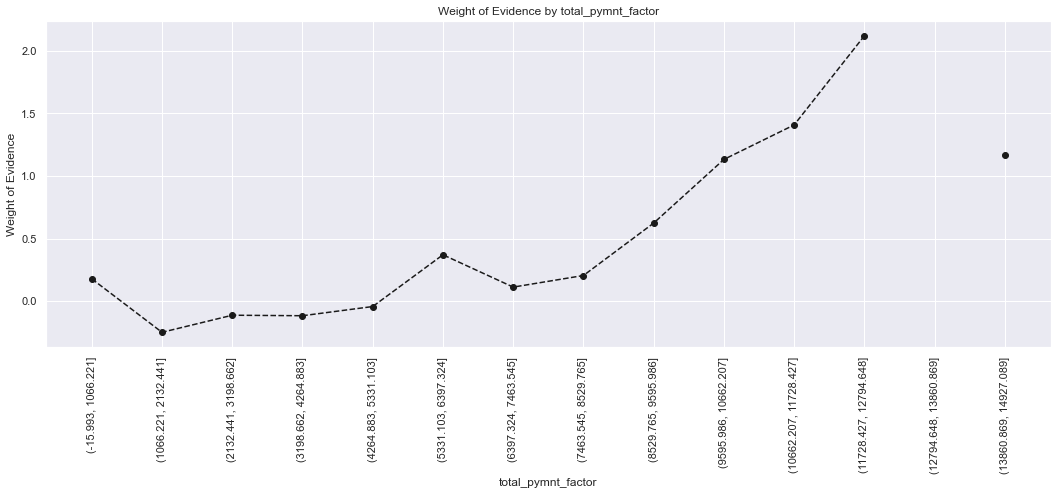

In [261]:
plot_by_woe(df_temp, 90)

In [262]:
X_train_prepr['total_pymnt:<4266.469'] = np.where(X_train_prepr['total_pymnt']<=4266.469,1,0)
X_train_prepr['total_pymnt:4266.469-9599.556'] = np.where((X_train_prepr['total_pymnt']>4266.469)&(X_train_prepr['total_pymnt']<=9599.556),1,0)
X_train_prepr['total_pymnt:9599.556-16000'] = np.where((X_train_prepr['total_pymnt']>9599.556)&(X_train_prepr['total_pymnt']<=16000),1,0)
X_train_prepr['total_pymnt:>16000'] = np.where(X_train_prepr['total_pymnt']>16000,1,0)

#### total_rec_int

In [263]:
X_train_prepr['total_rec_int'].isnull().sum()

0

In [264]:
X_train_prepr['total_rec_int_factor'] = pd.cut(X_train_prepr['total_rec_int'],50)
df_temp = woe_ordered_continuous(X_train_prepr, 'total_rec_int_factor', y_train_prepr)
df_temp

,total_rec_int_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-8.624, 172.489]",16649,0.989008,0.197687,16466.0,183.0,0.199228,0.116561,0.536040,NaN,NaN,inf
1,"(172.489, 344.979]",13798,0.985288,0.163835,13595.0,203.0,0.164491,0.129299,0.240724,0.003721,0.295315,inf
2,"(344.979, 517.468]",10732,0.982855,0.127430,10548.0,184.0,0.127624,0.117197,0.085229,0.002433,0.155496,inf
3,"(517.468, 689.958]",8179,0.980193,0.097116,8017.0,162.0,0.097001,0.103185,-0.061804,0.002662,0.147033,inf
4,"(689.958, 862.447]",6458,0.980644,0.076681,6333.0,125.0,0.076625,0.079618,-0.038312,0.000451,0.023492,inf
5,"(862.447, 1034.936]",5144,0.978421,0.061079,5033.0,111.0,0.060896,0.070701,-0.149286,0.002223,0.110974,inf
6,"(1034.936, 1207.426]",4060,0.976847,0.048208,3966.0,94.0,0.047986,0.059873,-0.221309,0.001574,0.072023,inf
7,"(1207.426, 1379.915]",3288,0.972324,0.039041,3197.0,91.0,0.038682,0.057962,-0.404418,0.004524,0.183110,inf
8,"(1379.915, 1552.405]",2796,0.978183,0.033199,2735.0,61.0,0.033092,0.038854,-0.160514,0.005860,0.243904,inf
9,"(1552.405, 1724.894]",2287,0.975077,0.027155,2230.0,57.0,0.026982,0.036306,-0.296822,0.003107,0.136307,inf


In [265]:
# Initial investigation shows that there are little observation with total_rec_int >5000
# Generally observation with high total_rec_int has low default probability
# hence we can treat all observation with total_rec_int > 5000 as 1 dummy category
# we continue WOE binning with observations where total_rec_int <5000

In [266]:
X_train_prepr_temp = X_train_prepr[(X_train_prepr['total_rec_int']<=5000)]

In [267]:
X_train_prepr_temp['total_rec_int_factor'] = pd.cut(X_train_prepr_temp['total_rec_int'], 20)
df_temp =woe_ordered_continuous(X_train_prepr_temp, 'total_rec_int_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

<ipython-input-267-e2d705c82ee7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_prepr_temp['total_rec_int_factor'] = pd.cut(X_train_prepr_temp['total_rec_int'], 20)


,total_rec_int_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-4.998, 249.886]",23224,0.988503,0.276872,22957.0,267.0,0.278882,0.170935,0.489507,NaN,NaN,0.107023
1,"(249.886, 499.771]",17004,0.983474,0.202718,16723.0,281.0,0.203151,0.179898,0.121563,0.005029,0.367944,0.107023
2,"(499.771, 749.656]",11567,0.979943,0.137899,11335.0,232.0,0.137698,0.148528,-0.075710,0.003532,0.197272,0.107023
3,"(749.656, 999.542]",8206,0.979283,0.097830,8036.0,170.0,0.097621,0.108835,-0.108734,0.000659,0.033025,0.107023
4,"(999.542, 1249.428]",5903,0.977469,0.070374,5770.0,133.0,0.070094,0.085147,-0.194545,0.001814,0.085810,0.107023
5,"(1249.428, 1499.313]",4355,0.974053,0.051919,4242.0,113.0,0.051532,0.072343,-0.339220,0.003416,0.144676,0.107023
6,"(1499.313, 1749.198]",3398,0.975280,0.040510,3314.0,84.0,0.040259,0.053777,-0.289528,0.001227,0.049692,0.107023
7,"(1749.198, 1999.084]",2522,0.967883,0.030067,2441.0,81.0,0.029653,0.051857,-0.558909,0.007397,0.269380,0.107023
8,"(1999.084, 2248.97]",1799,0.968316,0.021447,1742.0,57.0,0.021162,0.036492,-0.544885,0.000433,0.014024,0.107023
9,"(2248.97, 2498.855]",1383,0.973970,0.016488,1347.0,36.0,0.016363,0.023047,-0.342507,0.005654,0.202378,0.107023


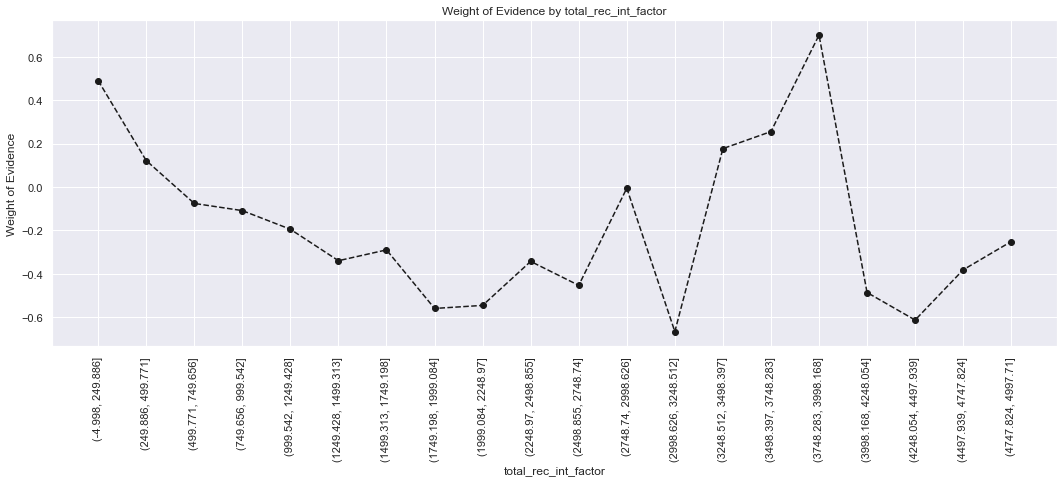

In [268]:
plot_by_woe(df_temp, 90)

In [269]:
X_train_prepr['total_rec_int:<1249.39'] = np.where(X_train_prepr['total_rec_int']<=4266.469,1,0)
X_train_prepr['total_rec_int:1249.39-2498.78'] = np.where((X_train_prepr['total_rec_int']>1249.39)&(X_train_prepr['total_rec_int']<=2498.78),1,0)
X_train_prepr['total_rec_int:2498.78-3998.048'] = np.where((X_train_prepr['total_rec_int']>2498.78)&(X_train_prepr['total_rec_int']<=3998.048),1,0)
X_train_prepr['total_rec_int:3998.048-5000'] = np.where((X_train_prepr['total_rec_int']>3998.048)&(X_train_prepr['total_rec_int']<=5000),1,0)
X_train_prepr['total_rec_int:>5000'] = np.where(X_train_prepr['total_rec_int']>5000,1,0)

#### last_pymnt_amnt

In [270]:
X_train_prepr['last_pymnt_amnt'].isnull().sum()

0

In [271]:
X_train_prepr['total_rec_int_factor'] = pd.cut(X_train_prepr['total_rec_int'],50)
df_temp = woe_ordered_continuous(X_train_prepr, 'total_rec_int_factor', y_train_prepr)
df_temp

,total_rec_int_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-8.624, 172.489]",16649,0.989008,0.197687,16466.0,183.0,0.199228,0.116561,0.536040,NaN,NaN,inf
1,"(172.489, 344.979]",13798,0.985288,0.163835,13595.0,203.0,0.164491,0.129299,0.240724,0.003721,0.295315,inf
2,"(344.979, 517.468]",10732,0.982855,0.127430,10548.0,184.0,0.127624,0.117197,0.085229,0.002433,0.155496,inf
3,"(517.468, 689.958]",8179,0.980193,0.097116,8017.0,162.0,0.097001,0.103185,-0.061804,0.002662,0.147033,inf
4,"(689.958, 862.447]",6458,0.980644,0.076681,6333.0,125.0,0.076625,0.079618,-0.038312,0.000451,0.023492,inf
5,"(862.447, 1034.936]",5144,0.978421,0.061079,5033.0,111.0,0.060896,0.070701,-0.149286,0.002223,0.110974,inf
6,"(1034.936, 1207.426]",4060,0.976847,0.048208,3966.0,94.0,0.047986,0.059873,-0.221309,0.001574,0.072023,inf
7,"(1207.426, 1379.915]",3288,0.972324,0.039041,3197.0,91.0,0.038682,0.057962,-0.404418,0.004524,0.183110,inf
8,"(1379.915, 1552.405]",2796,0.978183,0.033199,2735.0,61.0,0.033092,0.038854,-0.160514,0.005860,0.243904,inf
9,"(1552.405, 1724.894]",2287,0.975077,0.027155,2230.0,57.0,0.026982,0.036306,-0.296822,0.003107,0.136307,inf


In [272]:
# same as above variables, there are few observations > 5000
# observations >5000 has low prop_n_bad

In [273]:
X_train_prepr_temp = X_train_prepr[(X_train_prepr['last_pymnt_amnt']<=10000)]

In [274]:
X_train_prepr_temp['last_pymnt_amnt_factor'] = pd.cut(X_train_prepr_temp['last_pymnt_amnt'], 15)
df_temp =woe_ordered_continuous(X_train_prepr_temp, 'last_pymnt_amnt_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

<ipython-input-274-7089bc136b5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_prepr_temp['last_pymnt_amnt_factor'] = pd.cut(X_train_prepr_temp['last_pymnt_amnt'], 15)


,last_pymnt_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-10.0, 666.667]",66442,0.981382,0.812706,65205.0,1237.0,0.813172,0.788903,0.030299,NaN,NaN,inf
1,"(666.667, 1333.333]",13383,0.976239,0.163698,13065.0,318.0,0.162934,0.202806,-0.218907,0.005144,0.249206,inf
2,"(1333.333, 2000.0]",170,0.952941,0.002079,162.0,8.0,0.002020,0.005102,-0.926393,0.023297,0.707486,inf
3,"(2000.0, 2666.667]",132,0.977273,0.001615,129.0,3.0,0.001609,0.001913,-0.173348,0.024332,0.753045,inf
4,"(2666.667, 3333.333]",110,0.990909,0.001345,109.0,1.0,0.001359,0.000638,0.756800,0.013636,0.930148,inf
5,"(3333.333, 4000.0]",114,1.000000,0.001394,114.0,0.0,0.001422,0.000000,inf,0.009091,inf,inf
6,"(4000.0, 4666.667]",134,1.000000,0.001639,134.0,0.0,0.001671,0.000000,inf,0.000000,NaN,inf
7,"(4666.667, 5333.333]",193,1.000000,0.002361,193.0,0.0,0.002407,0.000000,inf,0.000000,NaN,inf
8,"(5333.333, 6000.0]",161,0.993789,0.001969,160.0,1.0,0.001995,0.000638,1.140626,0.006211,inf,inf
9,"(6000.0, 6666.667]",165,1.000000,0.002018,165.0,0.0,0.002058,0.000000,inf,0.006211,inf,inf


In [275]:
# we may need to drop this variable due to too many observations with 0 n_bad

#### tot_cur_bal

In [276]:
# Again, because of very few obs > 64,000, we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['tot_cur_bal'] <= 64000].copy()
# fine-classing
X_train_prepr_temp['tot_cur_bal_factor'] = pd.cut(X_train_prepr_temp['tot_cur_bal'], 25)
# preprocess
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'tot_cur_bal_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

,tot_cur_bal_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-64.0, 2560.0]",428,0.969626,0.011307,415.0,13.0,0.011196,0.016518,-0.388898,NaN,NaN,0.0309
1,"(2560.0, 5120.0]",1011,0.978239,0.026709,989.0,22.0,0.026682,0.027954,-0.046575,0.008613,0.342323,0.0309
2,"(5120.0, 7680.0]",1474,0.981004,0.038940,1446.0,28.0,0.039011,0.035578,0.092125,0.002765,0.138700,0.0309
3,"(7680.0, 10240.0]",1708,0.980679,0.045122,1675.0,33.0,0.045190,0.041931,0.074834,0.000325,0.017291,0.0309
4,"(10240.0, 12800.0]",1899,0.984729,0.050168,1870.0,29.0,0.050451,0.036849,0.314171,0.004050,0.239337,0.0309
5,"(12800.0, 15360.0]",1901,0.983693,0.050221,1870.0,31.0,0.050451,0.039390,0.247479,0.001036,0.066691,0.0309
6,"(15360.0, 17920.0]",2117,0.976854,0.055927,2068.0,49.0,0.055792,0.062262,-0.109710,0.006839,0.357190,0.0309
7,"(17920.0, 20480.0]",2117,0.980161,0.055927,2075.0,42.0,0.055981,0.053367,0.047820,0.003307,0.157530,0.0309
8,"(20480.0, 23040.0]",2165,0.978291,0.057195,2118.0,47.0,0.057141,0.059720,-0.044147,0.001870,0.091967,0.0309
9,"(23040.0, 25600.0]",2112,0.977273,0.055795,2064.0,48.0,0.055684,0.060991,-0.091027,0.001018,0.046880,0.0309


In [277]:
# we drop this variable due to very low IV value

#### total_rev_hi_lim

In [278]:
X_train_prepr['total_rev_hi_lim'].isnull().sum()

0

In [279]:
X_train_prepr['total_rev_hi_lim_factor'] = pd.cut(X_train_prepr['total_rev_hi_lim'],50)
df_temp = woe_ordered_continuous(X_train_prepr, 'total_rev_hi_lim_factor', y_train_prepr)
df_temp

D:\Anaconda\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-1119.2, 22384.0]",38126,0.977706,0.452701,37276.0,850.0,0.451016,0.541401,-0.182658,NaN,NaN,inf
1,"(22384.0, 44768.0]",27448,0.982221,0.325912,26960.0,488.0,0.326199,0.310828,0.048267,0.004515,0.230926,inf
2,"(44768.0, 67152.0]",10478,0.985971,0.124414,10331.0,147.0,0.124998,0.093631,0.288945,0.003750,0.240678,inf
3,"(67152.0, 89536.0]",4123,0.988601,0.048956,4076.0,47.0,0.049317,0.029936,0.499197,0.002630,0.210252,inf
4,"(89536.0, 111920.0]",1775,0.991549,0.021076,1760.0,15.0,0.021295,0.009554,0.801492,0.002949,0.302295,inf
5,"(111920.0, 134304.0]",905,0.988950,0.010746,895.0,10.0,0.010829,0.006369,0.530712,0.002599,0.270780,inf
6,"(134304.0, 156688.0]",431,0.993039,0.005118,428.0,3.0,0.005179,0.001911,0.996984,0.004089,0.466272,inf
7,"(156688.0, 179072.0]",295,0.989831,0.003503,292.0,3.0,0.003533,0.001911,0.614614,0.003209,0.382369,inf
8,"(179072.0, 201456.0]",161,0.987578,0.001912,159.0,2.0,0.001924,0.001274,0.412230,0.002253,0.202384,inf
9,"(201456.0, 223840.0]",119,0.983193,0.001413,117.0,2.0,0.001416,0.001274,0.105500,0.004384,0.306730,inf


In [280]:
# initial examination reveals very few obs > 79,000, we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['total_rev_hi_lim'] <= 79000].copy()
# fine-classing
X_train_prepr_temp['total_rev_hi_lim_factor'] = pd.cut(X_train_prepr_temp['total_rev_hi_lim'], 25)
# preprocess
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'total_rev_hi_lim_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-79.0, 3160.0]",953,0.962225,0.012108,917.0,36.0,0.011880,0.023638,-0.687960,NaN,NaN,0.05113
1,"(3160.0, 6320.0]",3596,0.976363,0.045687,3511.0,85.0,0.045487,0.055811,-0.204544,0.014138,0.483416,0.05113
2,"(6320.0, 9480.0]",5553,0.973168,0.070550,5404.0,149.0,0.070012,0.097833,-0.334601,0.003195,0.130057,0.05113
3,"(9480.0, 12640.0]",7060,0.977337,0.089696,6900.0,160.0,0.089393,0.105056,-0.161446,0.004169,0.173154,0.05113
4,"(12640.0, 15800.0]",7236,0.979961,0.091932,7091.0,145.0,0.091868,0.095207,-0.035701,0.002624,0.125745,0.05113
5,"(15800.0, 18960.0]",6833,0.979804,0.086812,6695.0,138.0,0.086737,0.090611,-0.043686,0.000157,0.007985,0.05113
6,"(18960.0, 22120.0]",6514,0.980350,0.082759,6386.0,128.0,0.082734,0.084045,-0.015716,0.000546,0.027971,0.05113
7,"(22120.0, 25280.0]",5436,0.981236,0.069064,5334.0,102.0,0.069105,0.066973,0.031335,0.000886,0.047051,0.05113
8,"(25280.0, 28440.0]",5113,0.980246,0.064960,5012.0,101.0,0.064933,0.066316,-0.021079,0.000990,0.052414,0.05113
9,"(28440.0, 31600.0]",4474,0.981448,0.056842,4391.0,83.0,0.056888,0.054498,0.042923,0.001202,0.064002,0.05113


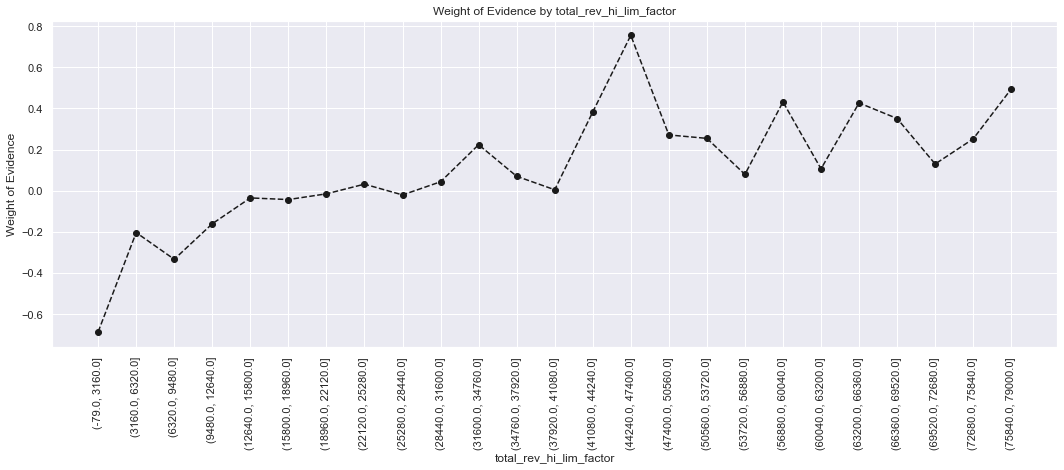

In [281]:
plot_by_woe(df_temp, 90)

In [282]:
X_train_prepr['total_rev_hi_lim:<6320'] = np.where(X_train_prepr['total_rev_hi_lim']<=6320,1,0)
X_train_prepr['total_rev_hi_lim:6320-22120'] = np.where((X_train_prepr['total_rev_hi_lim']>6320)&(X_train_prepr['total_rev_hi_lim']<=22120),1,0)
X_train_prepr['total_rev_hi_lim:22120-37920'] = np.where((X_train_prepr['total_rev_hi_lim']>22120)&(X_train_prepr['total_rev_hi_lim']<=37920),1,0)
X_train_prepr['total_rev_hi_lim:37920-47400'] = np.where((X_train_prepr['total_rev_hi_lim']>37920)&(X_train_prepr['total_rev_hi_lim']<=47400),1,0)
X_train_prepr['total_rev_hi_lim:47400-79000'] = np.where((X_train_prepr['total_rev_hi_lim']>47400)&(X_train_prepr['total_rev_hi_lim']<=79000),1,0)
X_train_prepr['total_rev_hi_lim:>79000'] = np.where(X_train_prepr['total_rev_hi_lim']>79000,1,0)

#### inq_last_6_months

In [283]:
df_temp = woe_ordered_continuous(X_train_prepr, 'inq_last_6mths', y_train_prepr)
df_temp

,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,51448,0.984995,0.610884,50676.0,772.0,0.613147,0.491720,0.220696,NaN,NaN,inf
1,1.0,22218,0.978396,0.263812,21738.0,480.0,0.263016,0.305732,-0.150496,0.006599,0.371192,inf
2,2.0,7158,0.972059,0.084993,6958.0,200.0,0.084187,0.127389,-0.414197,0.006337,0.263701,inf
3,3.0,2437,0.966762,0.028936,2356.0,81.0,0.028506,0.051592,-0.593256,0.005297,0.179059,inf
4,4.0,715,0.965035,0.008490,690.0,25.0,0.008349,0.015924,-0.645711,0.001727,0.052456,inf
5,5.0,232,0.948276,0.002755,220.0,12.0,0.002662,0.007643,-1.054806,0.016759,0.409095,inf
6,6.0,11,1.000000,0.000131,11.0,0.0,0.000133,0.000000,inf,0.051724,inf,inf


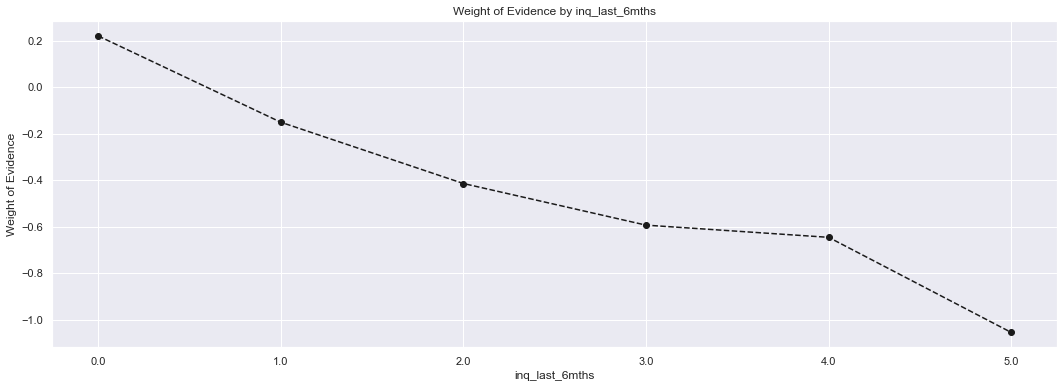

In [284]:
plot_by_woe(df_temp)

In [285]:
X_train_prepr['inq_last_6mths:0'] = np.where(X_train_prepr['inq_last_6mths'].isin([0]), 1, 0)
X_train_prepr['inq_last_6mths:1'] = np.where(X_train_prepr['inq_last_6mths'].isin([1]), 1, 0)
X_train_prepr['inq_last_6mths:2'] = np.where(X_train_prepr['inq_last_6mths'].isin([2]), 1, 0)
X_train_prepr['inq_last_6mths:3'] = np.where(X_train_prepr['inq_last_6mths'].isin([3]), 1, 0)
X_train_prepr['inq_last_6mths:4'] = np.where(X_train_prepr['inq_last_6mths'].isin([4]), 1, 0)
X_train_prepr['inq_last_6mths:5-6'] = np.where(X_train_prepr['inq_last_6mths'].isin(range(5, 7)), 1, 0)

#### dti

In [286]:
X_train_prepr['dti'].isnull().sum()

0

In [287]:
X_train_prepr['dti_factor'] = pd.cut(X_train_prepr['dti'], 50)
df_temp = woe_ordered_continuous(X_train_prepr, 'dti_factor', y_train_prepr)
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9.999, 199.98]",84217,0.981358,0.999976,82647.0,1570.0,0.999976,1.0,-0.000024,NaN,NaN,inf
1,"(199.98, 399.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(399.96, 599.94]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(599.94, 799.92]",1,1.000000,0.000012,1.0,0.0,0.000012,0.0,inf,NaN,NaN,inf
4,"(799.92, 999.9]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
5,"(999.9, 1199.88]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(1199.88, 1399.86]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
7,"(1399.86, 1599.84]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,"(1599.84, 1799.82]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
9,"(1799.82, 1999.8]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


In [288]:
# initial examination reveals that most dti<40, we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['dti'] <= 40].copy()
# fine-classing
X_train_prepr_temp['dti_factor'] = pd.cut(X_train_prepr_temp['dti'], 25)
# preprocess
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'dti_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 1.6]",439,0.977221,0.005214,429.0,10.0,0.005192,0.006369,-0.204425,NaN,NaN,0.071068
1,"(1.6, 3.199]",950,0.984211,0.011283,935.0,15.0,0.011316,0.009554,0.169199,0.006990,0.373625,0.071068
2,"(3.199, 4.799]",1613,0.988221,0.019157,1594.0,19.0,0.019291,0.012102,0.466266,0.004010,0.297067,0.071068
3,"(4.799, 6.398]",2394,0.981621,0.028432,2350.0,44.0,0.028440,0.028025,0.014684,0.006600,0.451582,0.071068
4,"(6.398, 7.998]",2973,0.986209,0.035309,2932.0,41.0,0.035483,0.026115,0.306571,0.004588,0.291887,0.071068
5,"(7.998, 9.598]",3796,0.983930,0.045083,3735.0,61.0,0.045202,0.038854,0.151332,0.002279,0.155239,0.071068
6,"(9.598, 11.197]",4406,0.982297,0.052328,4328.0,78.0,0.052378,0.049682,0.052855,0.001634,0.098477,0.071068
7,"(11.197, 12.797]",4957,0.986887,0.058872,4892.0,65.0,0.059204,0.041401,0.357672,0.004590,0.304817,0.071068
8,"(12.797, 14.396]",5510,0.984392,0.065439,5424.0,86.0,0.065642,0.054777,0.180944,0.002495,0.176728,0.071068
9,"(14.396, 15.996]",5600,0.984464,0.066508,5513.0,87.0,0.066719,0.055414,0.185659,0.000072,0.004715,0.071068


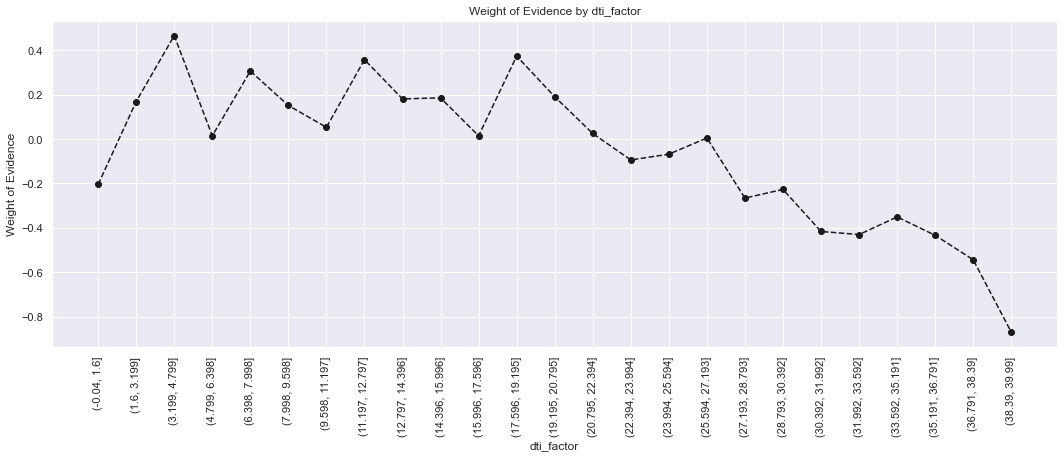

In [289]:
plot_by_woe(df_temp, 90)

In [290]:
X_train_prepr['dti:<1.6'] = np.where(X_train_prepr['dti']<=1.6,1,0)
X_train_prepr['dti:1.6-4.799'] = np.where((X_train_prepr['dti']>1.6)&(X_train_prepr['dti']<=4.799),1,0)
X_train_prepr['dti:4.799-9.598'] = np.where((X_train_prepr['dti']>4.799)&(X_train_prepr['dti']<=9.598),1,0)
X_train_prepr['dti:9.598-15.996'] = np.where((X_train_prepr['dti']>9.598)&(X_train_prepr['dti']<=15.996),1,0)
X_train_prepr['dti:15.996-20.795'] = np.where((X_train_prepr['dti']>15.996)&(X_train_prepr['dti']<=20.795),1,0)
X_train_prepr['dti:20.795-25.594'] = np.where((X_train_prepr['dti']>20.795)&(X_train_prepr['dti']<=25.594),1,0)
X_train_prepr['dti:25.594-33.592'] = np.where((X_train_prepr['dti']>25.594)&(X_train_prepr['dti']<=33.592),1,0)
X_train_prepr['dti:>33.592'] = np.where(X_train_prepr['dti']>33.592,1,0)

#### revol_util

In [291]:
X_train_prepr['revol_util'].isnull().sum()

35

In [292]:
X_train_prepr['revol_util_factor'] = pd.cut(X_train_prepr['revol_util'], 50)
df_temp = woe_ordered_continuous(X_train_prepr, 'revol_util_factor', y_train_prepr)
df_temp

,revol_util_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.162, 3.23]",963,0.976116,0.011439,940.0,23.0,0.011378,0.014668,-0.254017,NaN,NaN,inf
1,"(3.23, 6.46]",765,0.968627,0.009087,741.0,24.0,0.008969,0.015306,-0.534456,0.007489,0.280439,inf
2,"(6.46, 9.69]",955,0.979058,0.011344,935.0,20.0,0.011317,0.012755,-0.119588,0.010430,0.414867,inf
3,"(9.69, 12.92]",1250,0.992000,0.014848,1240.0,10.0,0.015009,0.006378,0.855879,0.012942,0.975467,inf
4,"(12.92, 16.15]",1379,0.981871,0.016381,1354.0,25.0,0.016389,0.015944,0.027540,0.010129,0.828339,inf
5,"(16.15, 19.38]",1774,0.984780,0.021073,1747.0,27.0,0.021146,0.017219,0.205416,0.002909,0.177876,inf
6,"(19.38, 22.61]",2065,0.987893,0.024530,2040.0,25.0,0.024693,0.015944,0.437427,0.003113,0.232011,inf
7,"(22.61, 25.84]",2342,0.981640,0.027820,2299.0,43.0,0.027828,0.027423,0.014627,0.006254,0.422800,inf
8,"(25.84, 29.07]",2624,0.981707,0.031170,2576.0,48.0,0.031180,0.030612,0.018390,0.000068,0.003763,inf
9,"(29.07, 32.3]",3011,0.983394,0.035767,2961.0,50.0,0.035841,0.031888,0.116857,0.001687,0.098467,inf


In [293]:
# initial examination reveals that most revol_util<100, we will filter them out first
X_train_prepr_temp = X_train_prepr[X_train_prepr['revol_util'] <= 100].copy()
# fine-classing
X_train_prepr_temp['revol_util_factor'] = pd.cut(X_train_prepr_temp['revol_util'], 25)
# preprocess
df_temp = woe_ordered_continuous(X_train_prepr_temp, 'revol_util_factor', y_train_prepr[X_train_prepr_temp.index])
df_temp

,revol_util_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.1, 4.0]",1148,0.974739,0.013713,1119.0,29.0,0.013619,0.018686,-0.316266,NaN,NaN,0.036488
1,"(4.0, 8.0]",1017,0.971485,0.012148,988.0,29.0,0.012025,0.018686,-0.440774,0.003254,0.124508,0.036488
2,"(8.0, 12.0]",1423,0.987351,0.016998,1405.0,18.0,0.017100,0.011598,0.388260,0.015866,0.829034,0.036488
3,"(12.0, 16.0]",1686,0.984579,0.020140,1660.0,26.0,0.020204,0.016753,0.187316,0.002772,0.200944,0.036488
4,"(16.0, 20.0]",2221,0.985142,0.026530,2188.0,33.0,0.026630,0.021263,0.225075,0.000563,0.037759,0.036488
5,"(20.0, 24.0]",2615,0.987763,0.031237,2583.0,32.0,0.031438,0.020619,0.421810,0.002621,0.196735,0.036488
6,"(24.0, 28.0]",3138,0.978649,0.037484,3071.0,67.0,0.037377,0.043170,-0.144095,0.009114,0.565905,0.036488
7,"(28.0, 32.0]",3614,0.984228,0.043170,3557.0,57.0,0.043292,0.036727,0.164461,0.005579,0.308556,0.036488
8,"(32.0, 36.0]",4023,0.981357,0.048056,3948.0,75.0,0.048051,0.048325,-0.005684,0.002871,0.170145,0.036488
9,"(36.0, 40.0]",4389,0.985418,0.052428,4325.0,64.0,0.052639,0.041237,0.244124,0.004061,0.249808,0.036488


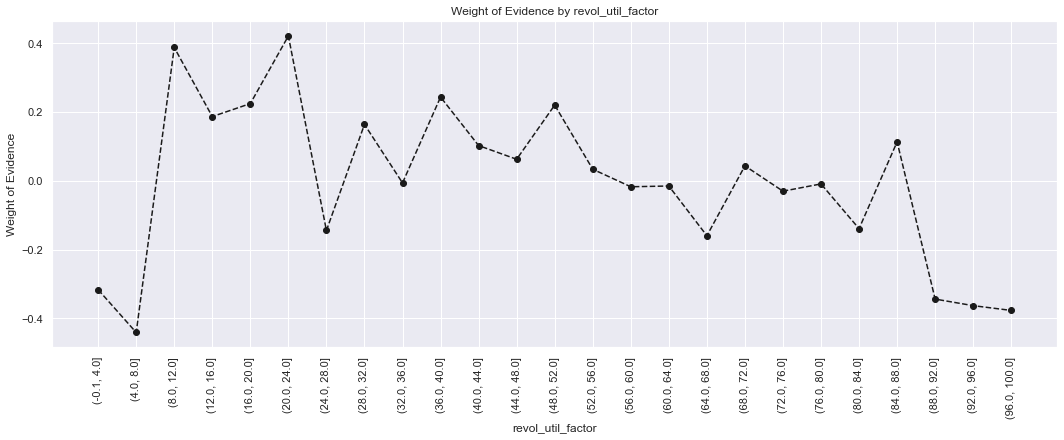

In [294]:
plot_by_woe(df_temp, 90)

In [295]:
X_train_prepr['revol_util:missing'] = np.where(X_train_prepr['revol_util'].isnull(),1,0)
X_train_prepr['revol_util:<32'] = np.where(X_train_prepr['revol_util']<=32,1,0)
X_train_prepr['revol_util:32-48'] = np.where((X_train_prepr['revol_util']>32)&(X_train_prepr['revol_util']<=48),1,0)
X_train_prepr['revol_util:48-60'] = np.where((X_train_prepr['revol_util']>48)&(X_train_prepr['revol_util']<=60),1,0)
X_train_prepr['revol_util:60-80'] = np.where((X_train_prepr['revol_util']>60)&(X_train_prepr['revol_util']<=80),1,0)
X_train_prepr['revol_util:80-100'] = np.where((X_train_prepr['revol_util']>80)&(X_train_prepr['revol_util']<=100),1,0)
X_train_prepr['revol_util:>100'] = np.where(X_train_prepr['revol_util']<=32,1,0)

#### mths_since_last_pymnt_d

In [296]:
X_train_prepr['mths_since_last_pymnt_d'].isnull().sum()

3498

In [297]:

# fine-classing
X_train_prepr['mths_since_last_pymnt_d_factor'] = pd.cut(X_train_prepr['mths_since_last_pymnt_d'], 10)
# preprocess
df_temp = woe_ordered_continuous(X_train_prepr, "mths_since_last_pymnt_d_factor", y_train_prepr)
df_temp

,mths_since_last_pymnt_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(54.988, 56.2]",75890,0.997536,0.940152,75703.0,187.0,0.955810,0.123188,2.048844,NaN,NaN,4.228347
1,"(56.2, 57.4]",955,0.672251,0.011831,642.0,313.0,0.008106,0.206192,-3.236235,0.325285,5.285079,4.228347
2,"(57.4, 58.6]",905,0.683978,0.011211,619.0,286.0,0.007815,0.188406,-3.182507,0.011727,0.053728,4.228347
3,"(58.6, 59.8]",706,0.713881,0.008746,504.0,202.0,0.006363,0.133070,-3.040312,0.029903,0.142195,4.228347
4,"(59.8, 61.0]",1155,0.721212,0.014309,833.0,322.0,0.010517,0.212121,-3.004138,0.007331,0.036174,4.228347
5,"(61.0, 62.2]",403,0.791563,0.004993,319.0,84.0,0.004028,0.055336,-2.620246,0.070351,0.383892,4.228347
6,"(62.2, 63.4]",291,0.804124,0.003605,234.0,57.0,0.002954,0.037549,-2.542351,0.012560,0.077896,4.228347
7,"(63.4, 64.6]",208,0.812500,0.002577,169.0,39.0,0.002134,0.025692,-2.488283,0.008376,0.054067,4.228347
8,"(64.6, 65.8]",131,0.839695,0.001623,110.0,21.0,0.001389,0.013834,-2.298663,0.027195,0.189621,4.228347
9,"(65.8, 67.0]",77,0.909091,0.000954,70.0,7.0,0.000884,0.004611,-1.652035,0.069396,0.646627,4.228347


We ignore this variable due to abnormally high IV

#### mths_since_issue_d

In [298]:
X_train_prepr['mths_since_issue_d'].isnull().sum()

0

In [299]:
# fine-classing
X_train_prepr['mths_since_issue_d_factor'] = pd.cut(X_train_prepr['mths_since_issue_d'], 10)
# preprocess
df_temp = woe_ordered_continuous(X_train_prepr, "mths_since_issue_d_factor", y_train_prepr)
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(55.989, 57.1]",16610,0.998916,0.197224,16592.0,18.0,0.200753,0.011465,2.862777,NaN,NaN,1.224597
1,"(57.1, 58.2]",9763,0.998156,0.115924,9745.0,18.0,0.117908,0.011465,2.330611,0.000760,0.532166,1.224597
2,"(58.2, 59.3]",5687,0.995252,0.067526,5660.0,27.0,0.068482,0.017197,1.381815,0.002904,0.948796,1.224597
3,"(59.3, 60.4]",7107,0.990432,0.084387,7039.0,68.0,0.085167,0.043312,0.676187,0.004820,0.705629,1.224597
4,"(60.4, 61.5]",9060,0.984658,0.107577,8921.0,139.0,0.107938,0.088535,0.198162,0.005774,0.478024,1.224597
5,"(61.5, 62.6]",5655,0.980548,0.067146,5545.0,110.0,0.067091,0.070064,-0.043356,0.004110,0.241518,1.224597
6,"(62.6, 63.7]",6408,0.970350,0.076087,6218.0,190.0,0.075234,0.121019,-0.475348,0.010199,0.431992,1.224597
7,"(63.7, 64.8]",7111,0.966812,0.084435,6875.0,236.0,0.083183,0.150318,-0.591712,0.003538,0.116364,1.224597
8,"(64.8, 65.9]",5059,0.958885,0.060070,4851.0,208.0,0.058694,0.132484,-0.814125,0.007927,0.222413,1.224597
9,"(65.9, 67.0]",11759,0.952717,0.139624,11203.0,556.0,0.135549,0.354140,-0.960359,0.006168,0.146233,1.224597


We ignore this variable due to abnormally high IV

#### mths_since_last_credit_pull_d

In [300]:
X_train_prepr['mths_since_last_credit_pull_d'].isnull().sum()

2

In [301]:
# fine-classing
X_train_prepr['mths_since_last_credit_pull_d_factor'] = pd.cut(X_train_prepr['mths_since_last_credit_pull_d'], 12)
# preprocess
df_temp = woe_ordered_continuous(X_train_prepr, "mths_since_last_credit_pull_d_factor", y_train_prepr)
df_temp

,mths_since_last_credit_pull_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(54.987, 56.083]",81619,0.982014,0.969151,80151.0,1468.0,0.969799,0.935032,0.036509,NaN,NaN,0.047233
1,"(56.083, 57.167]",612,0.977124,0.007267,598.0,14.0,0.007236,0.008917,-0.208969,0.004890,0.245478,0.047233
2,"(57.167, 58.25]",491,0.987780,0.005830,485.0,6.0,0.005868,0.003822,0.428887,0.010656,0.637856,0.047233
3,"(58.25, 59.333]",400,0.927500,0.004750,371.0,29.0,0.004489,0.018471,-1.414597,0.060280,1.843483,0.047233
4,"(59.333, 60.417]",289,0.923875,0.003432,267.0,22.0,0.003231,0.014013,-1.467297,0.003625,0.052700,0.047233
5,"(60.417, 61.5]",270,0.948148,0.003206,256.0,14.0,0.003098,0.008917,-1.057383,0.024273,0.409914,0.047233
6,"(61.5, 62.583]",180,0.966667,0.002137,174.0,6.0,0.002105,0.003822,-0.596207,0.018519,0.461176,0.047233
7,"(62.583, 63.667]",124,0.959677,0.001472,119.0,5.0,0.001440,0.003185,-0.793817,0.006989,0.197610,0.047233
8,"(63.667, 64.75]",104,0.980769,0.001235,102.0,2.0,0.001234,0.001274,-0.031677,0.021092,0.762140,0.047233
9,"(64.75, 65.833]",64,0.968750,0.000760,62.0,2.0,0.000750,0.001274,-0.529516,0.012019,0.497838,0.047233


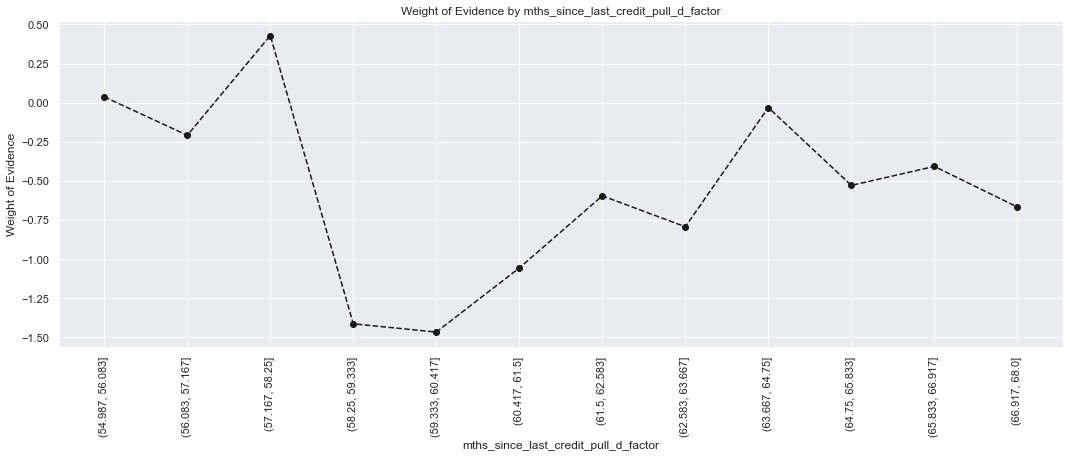

In [302]:
plot_by_woe(df_temp, 90)

In [303]:
X_train_prepr['mths_since_last_credit_pull_d:missing'] = np.where(X_train_prepr['mths_since_last_credit_pull_d'].isnull(),1,0)
X_train_prepr['mths_since_last_credit_pull_d:<58.25'] = np.where(X_train_prepr['mths_since_last_credit_pull_d']<=58.25,1,0)
X_train_prepr['mths_since_last_credit_pull_d:58.25-62.583'] = np.where((X_train_prepr['mths_since_last_credit_pull_d']>58.25)&(X_train_prepr['mths_since_last_credit_pull_d']<=62.583),1,0)
X_train_prepr['mths_since_last_credit_pull_d:62.583-65.833'] = np.where((X_train_prepr['mths_since_last_credit_pull_d']>62.583)&(X_train_prepr['mths_since_last_credit_pull_d']<=65.833),1,0)
X_train_prepr['mths_since_last_credit_pull_d:>65.833'] = np.where(X_train_prepr['mths_since_last_credit_pull_d']>65.833,1,0)

#### mths_since_earliest_cr_line

In [304]:
X_train_prepr['mths_since_earliest_cr_line'].isnull().sum()

0

In [305]:
# fine-classing
X_train_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(X_train_prepr['mths_since_earliest_cr_line'], 25)
# preprocess
df_temp = woe_ordered_continuous(X_train_prepr, 'mths_since_earliest_cr_line_factor', y_train_prepr)
df_temp

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(92.474, 114.04]",1366,0.978770,0.016220,1337.0,29.0,0.016177,0.018471,-0.132639,NaN,NaN,0.043987
1,"(114.04, 135.08]",2013,0.970691,0.023902,1954.0,59.0,0.023642,0.037580,-0.463431,0.008080,0.330791,0.043987
2,"(135.08, 156.12]",3173,0.977309,0.037676,3101.0,72.0,0.037520,0.045860,-0.200713,0.006618,0.262717,0.043987
3,"(156.12, 177.16]",5238,0.975945,0.062195,5112.0,126.0,0.061852,0.080255,-0.260463,0.001364,0.059750,0.043987
4,"(177.16, 198.2]",8629,0.979604,0.102459,8453.0,176.0,0.102276,0.112102,-0.091734,0.003659,0.168729,0.043987
5,"(198.2, 219.24]",9933,0.978456,0.117943,9719.0,214.0,0.117594,0.136306,-0.147665,0.001148,0.055931,0.043987
6,"(219.24, 240.28]",10160,0.981299,0.120638,9970.0,190.0,0.120631,0.121019,-0.003215,0.002844,0.144450,0.043987
7,"(240.28, 261.32]",8405,0.981083,0.099799,8246.0,159.0,0.099771,0.101274,-0.014948,0.000217,0.011732,0.043987
8,"(261.32, 282.36]",6642,0.981331,0.078866,6518.0,124.0,0.078864,0.078981,-0.001486,0.000248,0.013462,0.043987
9,"(282.36, 303.4]",6028,0.985070,0.071575,5938.0,90.0,0.071846,0.057325,0.225791,0.003739,0.227277,0.043987


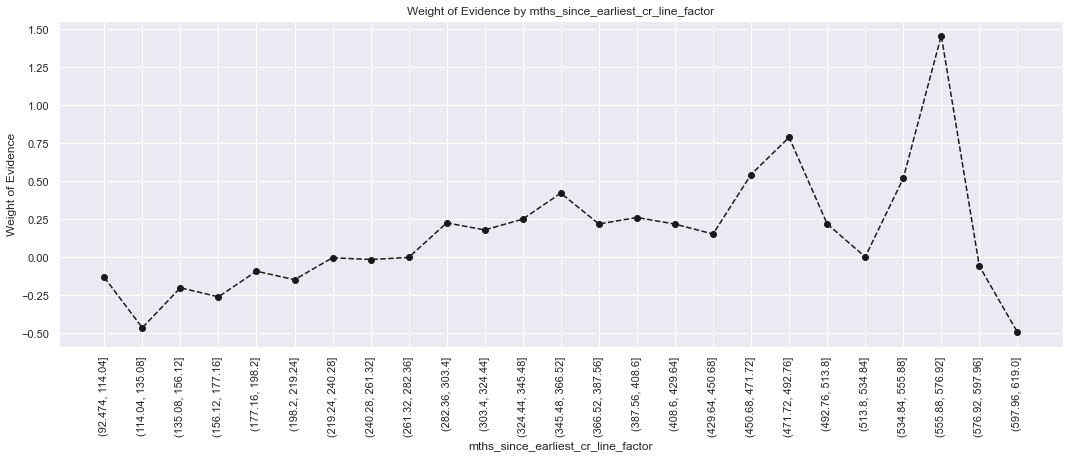

In [306]:
plot_by_woe(df_temp, 90)

In [307]:
X_train_prepr['mths_since_earliest_cr_line:<198.2'] = np.where((X_train_prepr['mths_since_earliest_cr_line'] <= 198.2), 1, 0)
X_train_prepr['mths_since_earliest_cr_line:198.2-303.4'] = np.where((X_train_prepr['mths_since_earliest_cr_line'] > 198.2) & (X_train_prepr['mths_since_earliest_cr_line'] <= 303.4), 1, 0)
X_train_prepr['mths_since_earliest_cr_line:303.4-387.56'] = np.where((X_train_prepr['mths_since_earliest_cr_line'] > 303.4) & (X_train_prepr['mths_since_earliest_cr_line'] <= 387.56), 1, 0)
X_train_prepr['mths_since_earliest_cr_line:387.56-450.68'] = np.where((X_train_prepr['mths_since_earliest_cr_line'] > 387.56) & (X_train_prepr['mths_since_earliest_cr_line'] <= 450.68), 1, 0)
X_train_prepr['mths_since_earliest_cr_line:>450.68'] = np.where(X_train_prepr['mths_since_earliest_cr_line'] > 450.68,1,0) 

# Preprocess the dataset

In [308]:
#loan_data_X_train = X_train_prepr.copy()

In [195]:
#loan_data_X_train.to_csv('loan_data_X_train.csv')

In [309]:
loan_data_X_test = X_train_prepr.copy()

In [310]:
loan_data_X_test.shape

(84219, 144)

In [311]:
loan_data_X_train.shape

(336875, 144)

In [312]:
loan_data_X_test.to_csv('loan_data_X_test.csv')

In [313]:
y_train.to_csv('loan_data_y_train.csv', index=False)

In [314]:
y_test.to_csv('loan_data_y_test.csv', index=False)

In [315]:
y_test.shape

(84219,)

In [316]:
y_train.shape

(336875,)